<a href="https://colab.research.google.com/github/ParsaMohammadpour/Graph-Failure-Comparison/blob/main/graph_failures_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install networkx

# Importing Libraries

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
from collections import Counter
import os
import math

# Initializing

In [ ]:
NODE_NUMBER = 1000
MAX_EDGE_NUMBER = (NODE_NUMBER) * (NODE_NUMBER - 1) / 2
EDGE_PROBABILITY = 0.01
EDGE_NUMBER = int(MAX_EDGE_NUMBER * EDGE_PROBABILITY)  # Approximately 0.05 of max possible edge number
GRAPH_NUMBER = 10
FAILURE = [i/100 for i in range(5, 80, 5)]
SIMULATION_NUMBER = 2
COLOR = ['red', 'green', 'blue', 'gray', 'yellow', 'brown', 'black']

# Plots

### c.i plots

In [ ]:
def coefficient_interval_plot(data, path=None, alpha=0.95):
    x = np.array([i for i in range(len(data))])
    y = np.array(data)
    # plotting
    plt.plot(y, x,'o', color='blue', label='data')

    # confidence intervals
    p = ((1.0-alpha)/2.0) * 100
    # percentile function returns the numbers which that percent of
    # the array elements areless equal then that number
    lower =  np.percentile(y, p)
    p = (alpha+((1.0-alpha)/2.0)) * 100
    upper =  np.percentile(y, p)
#     print(f"\n{alpha*100} confidence interval {lower} and {upper}")

    # c.i upper & lower
    upper_y = np.array([0, len(data)])
    upper_x = np.array([upper, upper])
    plt.plot(upper_x, upper_y, color='red', linestyle='-.', label='upper c.i')

    lower_y = np.array([0, len(data)])
    lower_x = np.array([lower, lower])
    plt.plot(lower_x, lower_y, color='orange', linestyle='-.', label='lower c.i')

    ci_x = np.array([lower, upper])
    ci_y = np.array([0, 0])
    plt.plot(ci_x, ci_y, '-', color='green', label='c.i')
    plt.legend(loc='best')
    if path != None:
        plt.savefig(path+'.png')
    plt.show()

In [ ]:
def coefficient_interval_plot2(data, path=None, alpha=0.95):
    x = np.array(list(range(len(data))))
    y = np.array(data)
    # Plotting data
    plt.plot(x, y, '-o', color='red', label='data')

    # Define the confidence interval
    ci = (1.0-alpha) * np.std(y) / np.mean(y)

    # Plot the confidence interval
    plt.fill_between(x, (y-ci), (y+ci), color='blue', alpha=0.1)
    plt.plot(x, (y-2*ci), '--', color='blue', label='-*ci')
    plt.plot(x, (y+2*ci), '--', color='blue', label='+*ci')
    plt.fill_between(x, (y-2*ci), (y+2*ci), color='green', alpha=.1)
    plt.plot(x, (y-2*ci), '--', color='green', label='-2*ci')
    plt.plot(x, (y+2*ci), '--', color='green', label='+2*ci')
    plt.legend(loc='best')
    if path != None:
        plt.savefig(path+'.png')
    plt.show()

In [ ]:
def coefficient_interval_plot3(data, path=None, alpha=0.95):
    x = np.array(list(range(len(data))))
    y = np.array(data)
    # Plotting data
    plt.plot(x, y, '-o', color='red', label='data')

    # confidence intervals
    ci = (1.0-alpha) * np.std(y) / np.mean(y)
    mean = np.mean(y)
    avg = [mean for i in range(len(data))]

    # Plot the confidence interval
    plt.fill_between(x, (avg-ci), (avg+ci), color='blue', alpha=0.1)
    plt.plot(x, (avg-ci), '--', color='blue', label='-*ci')
    plt.plot(x, (avg+ci), '--', color='blue', label='+*ci')
    plt.fill_between(x, (avg-2*ci), (avg+2*ci), color='green', alpha=.1)
    plt.plot(x, (avg-2*ci), '--', color='green', label='-2*ci')
    plt.plot(x, (avg+2*ci), '--', color='green', label='+2*ci')
    plt.legend(loc='best')
    if path != None:
        plt.savefig(path+'.png')
    plt.show()

### result plot

In [ ]:
def simulation_diff_plot(isolation, disconnection, failure, path=None, style='-o'):
    plt.plot(list(range(len(disconnection))),disconnection, style, color = 'red', label='disconnection')
    plt.plot(list(range(len(isolation))), isolation, style, color = 'blue', label='isolation')
    plt.title('isolation an probability results for failure ' + str(failure))
    plt.xlabel('simulation number')
    plt.ylabel('probability')
    plt.legend(loc='best') # setting best location for labels
    if path != None:
        plt.savefig(path+'.png')
    plt.show()

In [ ]:
def draw_isolation_disconnection_plot(isolation, disconnection, path=None, style='-o'):
    plt.plot(FAILURE, disconnection, style, color='red', label='disconnection')
    plt.plot(FAILURE, isolation, style, color='blue', label='isolation')
    plt.xlabel("node failure probability")
    plt.ylabel("probability")
    plt.title('isolation & disconnection Probability')
    plt.legend(loc='best') # setting best location for labels
    if path != None:
        plt.savefig(path+'.png')
    plt.show()

### graph representation

In [ ]:
def show_graph(graph, path=None):
    pos = nx.circular_layout(graph)
    plt.figure(figsize = (12, 12))
    nx.draw_networkx(graph, pos)
    if path != None:
        plt.savefig(path+'.png')
    plt.show()

### degree distribution

In [ ]:
def degree_distribution(graph, path=None, style='-o'):
    degrees = [graph.degree(n) for n in graph.nodes()]
    degrees = list(sorted(degrees))
    degree_freq_dic = Counter(degrees)
    x_axis = degree_freq_dic.keys()
    y_axis = degree_freq_dic.values()
    y_axis = np.array(list(y_axis)) / len(degrees)

    plt.title('Degree Distribution')
    plt.xlabel("Degree")
    plt.ylabel("Frequesncy")
    plt.plot(x_axis, y_axis, style, label='degree probability')

    upper_y = np.array([0, max(y_axis)])
    avg = np.average(degrees)
    upper_x = np.array([avg, avg])
    plt.plot(upper_x, upper_y, color='red', linestyle='-.', label='mean')
    plt.legend(loc='best') # setting best location for labels

    if path != None:
        plt.savefig(path+'.png')
    plt.show()

In [ ]:
def double_log(graph, path=None, style='-o'):
    degrees = [graph.degree(n) for n in graph.nodes()]
    degrees = list(sorted(degrees))
    degree_freq_dic = Counter(degrees)
    unique_degrees = list(degree_freq_dic.keys())
    frequency = list(degree_freq_dic.values())
    x_axis = np.log(unique_degrees)
    y_axis = np.log(frequency)
    y_axis = np.array(list(y_axis)) / len(degrees)
    plt.xlabel("Degree")
    plt.ylabel("Degree Distribution")
    plt.title('Double Log')
    plt.plot(x_axis, y_axis, style, label='degree distribution')
    if path != None:
        plt.savefig(path+'.png')
    plt.show()

### comparison plot

In [ ]:
def compare_plot(datas, result_kind, labels, title='', path=None, style='-o'):
    x = np.array(list(range(len(datas[0]))))
    plt.title(title)
    plt.xlabel('simulation')
    plt.ylabel(f'{result_kind} probability')
    for i in range(len(datas)):
        plt.plot(x, datas[i], style, color=COLOR[i], label=lables[i])

    plt.legend(loc='best')
    if path != None:
        plt.savefig(path+'.png')
    plt.show()
    print(datas)

In [ ]:
# failure_kind, is node or edge
# result_kind, is isolation or disconnection
def compare(datas, lables, failure_kind='', result_kind='', style='-o'):
    for fail in range(len(FAILURE)):
        compare_data=[]
        for i in range(len(datas)):
            data = datas[i]
            failure_data = [x[fail] for x in data]
            print(f'{lables[i]} {failure_kind} {result_kind} probabilities, mean is: ', np.mean(failure_data))
            print(f'{lables[i]} {failure_kind} {result_kind} probabilities, std is: ', np.std(failure_data))
            compare_data.append(failure_data)

        compare_plot(compare_data, result_kind, lables, title=f'{failure_kind} failure {FAILURE[fail]} {result_kind} comparision', style=style)

# Failure Functions

In [ ]:
# removing nodes of graphs
# returns graph after node failure
def graph_node_failure(graph, failure):
    nodes = [i for i in graph.nodes]
    for node in nodes:
        graph.remove_node(node) if random.uniform(0.0, 1) <= failure else None

    return graph

In [ ]:
# removing edges of graph
# returns graph after edge failure
def graph_edge_failure(graph, failure):
    edges = [i for i in graph.edges]
    for edge in edges:
        graph.remove_edge(edge[0], edge[1]) if random.uniform(0.0, 1) <= failure else None

    return graph

In [ ]:
# iterate over all graphs & apply the failure
# then iterate over new graphs (graphs after failure applied)
# and returns isolation & disconnection probabillity
def isolation_disconnection_for_failure(graphs, failure, is_node_failure=True):
    new_graphs = []
    if is_node_failure:
        new_graphs = [graph_node_failure(graph.copy(), failure) for graph in graphs]
    else:
        new_graphs = [graph_edge_failure(graph.copy(), failure) for graph in graphs]

    isolation = [len(list(nx.isolates(graph))) > 0 for graph in new_graphs]
    disconection = [not nx.is_connected(graph) for graph in new_graphs]

    isolation_probability = sum(isolation) / len(graphs)
    disconnection_probability = sum(disconection) / len(graphs)

    return isolation_probability, disconnection_probability

In [ ]:
def apply_failure(graphs, is_node_failure=True, path=None):
    isolates = []
    disconnect = []
    for failure in FAILURE:
        print('failure: ', failure)
        isolation_probability, disconnection_probability = isolation_disconnection_for_failure(graphs, failure, is_node_failure)

#         print('probability of isolated graphs for failure ' + str(failure) + ' is: ', isolation_probability)
        isolates.append(isolation_probability)
#         print('probability of isolated graphs for disconected ' + str(failure) + ' is: ', disconnection_probability)
        disconnect.append(disconnection_probability)
#         print()

    draw_isolation_disconnection_plot(isolates, disconnect, path)
    return isolates, disconnect

# Small-World (watts-storgatz)

In [ ]:
small_worlds = []

k = round(((2 * EDGE_NUMBER) / NODE_NUMBER))

for i in range(GRAPH_NUMBER):
    print('Graph No: ', i)
    # we want to have EDGE_NUMBER edge, and in the base graph we have k degree
    # for each node. And we know summation of node degrees, is 2 * EDGE_NUMBER
    # so we have tohave k = (2 * EDGE_NUMBER) / NODE_NUMBER  for each node.
    rewiring_probability = random.uniform(0.2, 0.3)
    graph = graph = nx.watts_strogatz_graph(n=NODE_NUMBER, k=k, p=rewiring_probability)
    small_worlds.append(graph)
#     show_graph(graph)

Graph No:  0
Graph No:  1
Graph No:  2
Graph No:  3
Graph No:  4
Graph No:  5
Graph No:  6
Graph No:  7
Graph No:  8
Graph No:  9


### Degree Distribution

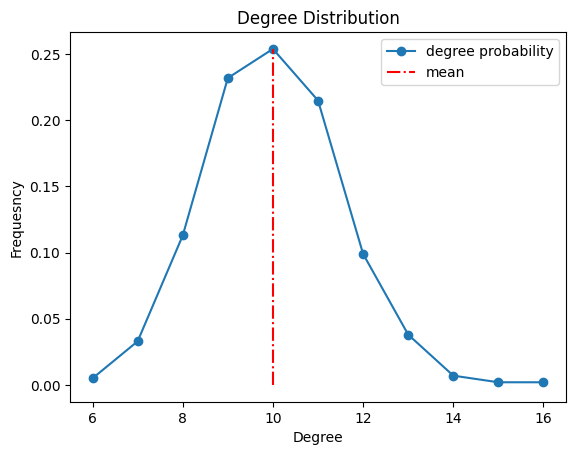

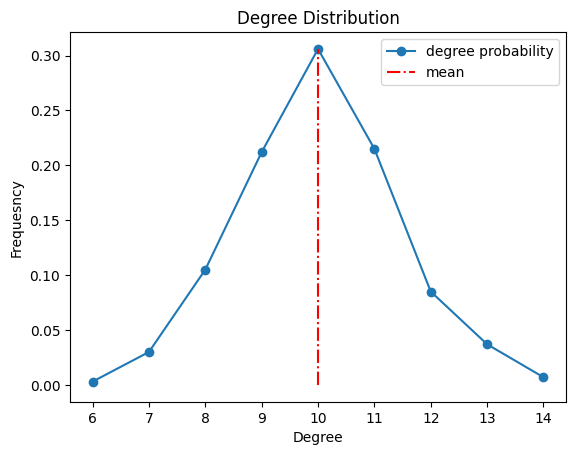

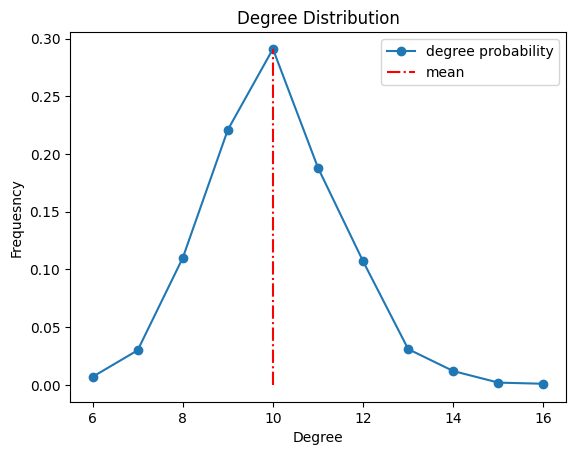

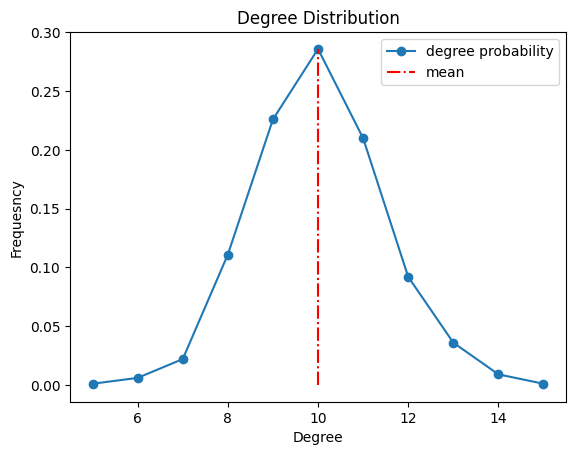

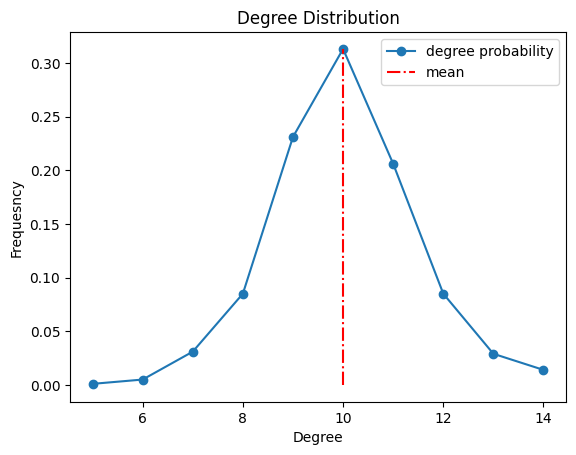

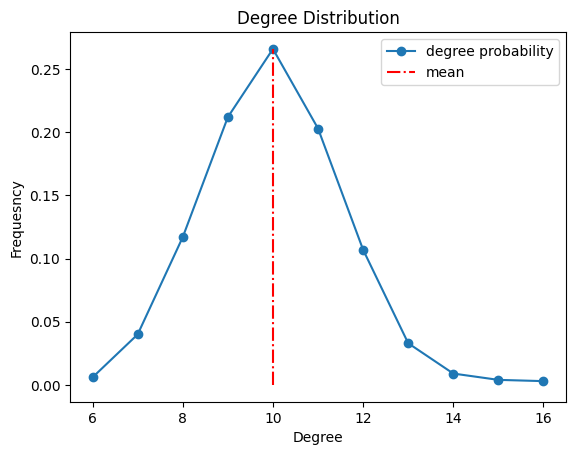

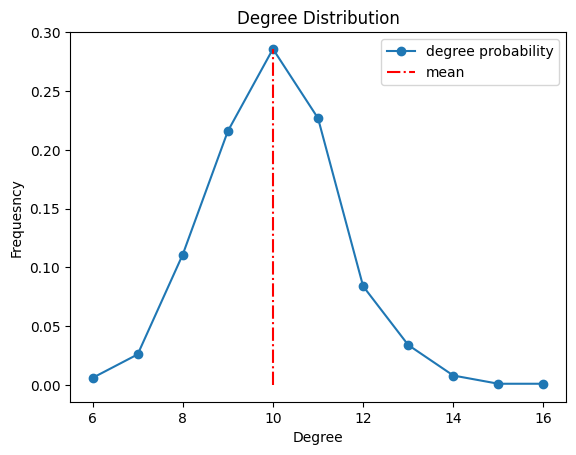

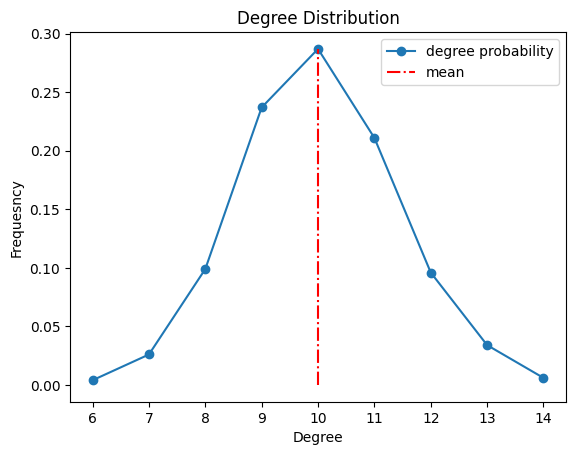

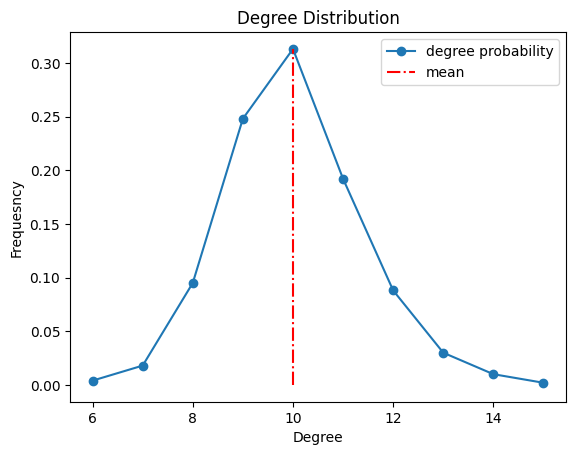

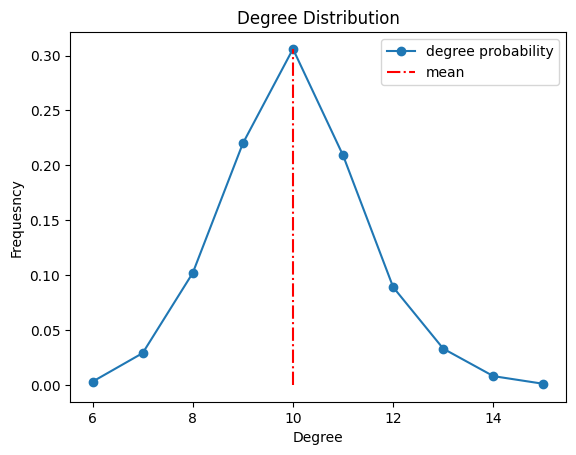

In [ ]:
for graph in small_worlds:
    degree_distribution(graph)

# Scale-Free (barabasi-albert)

In [ ]:
seed_values = random.sample(range(1, 1000), GRAPH_NUMBER) # generating GRAPH_NUMBER unique random number to be used as seed

m = round((EDGE_NUMBER / NODE_NUMBER))

scale_frees = []

for i in range(GRAPH_NUMBER):
    print('Graph no: ', i)
    graph = nx.barabasi_albert_graph(n=NODE_NUMBER, m=m, seed=seed_values[i], initial_graph=None)
    scale_frees.append(graph)

#     show_graph(graph)

Graph no:  0
Graph no:  1
Graph no:  2
Graph no:  3
Graph no:  4
Graph no:  5
Graph no:  6
Graph no:  7
Graph no:  8
Graph no:  9


### Degree Distribution

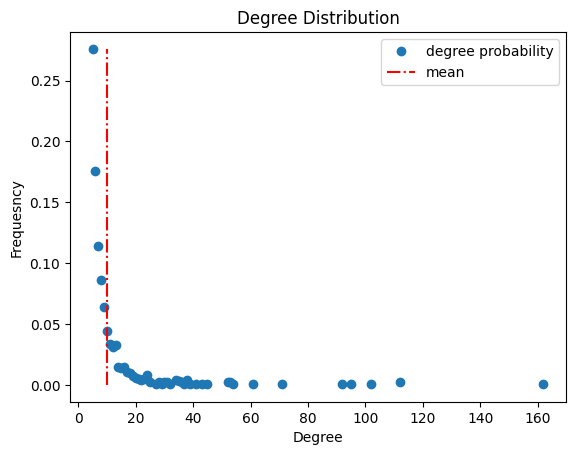

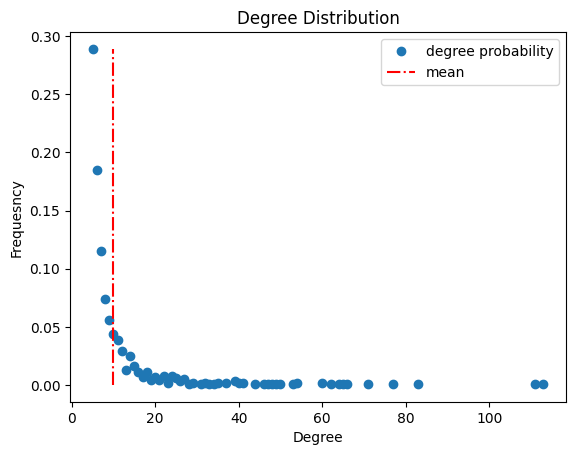

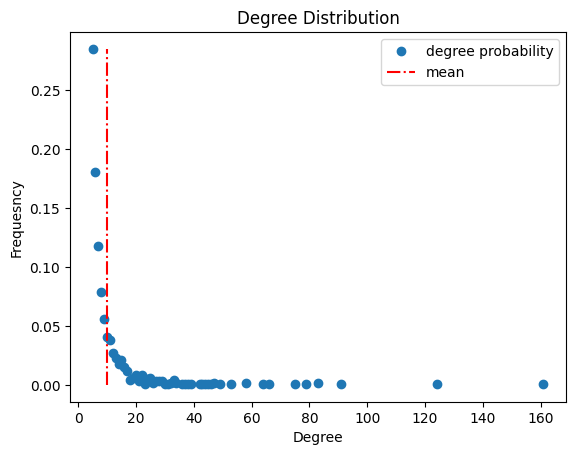

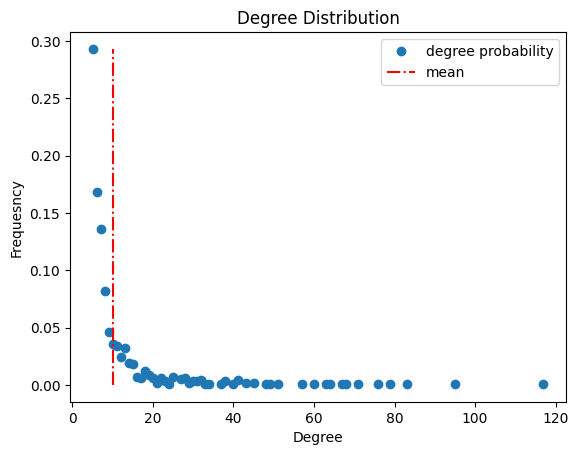

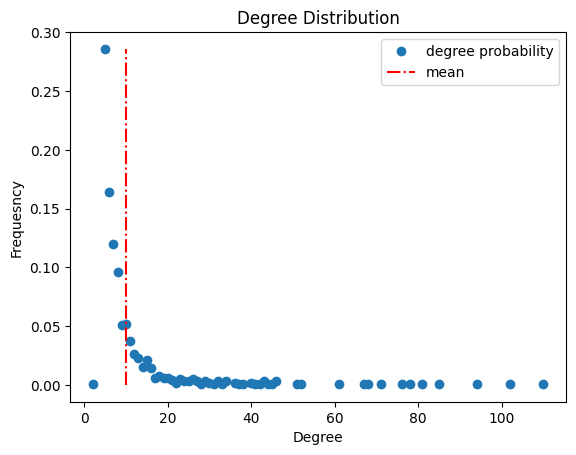

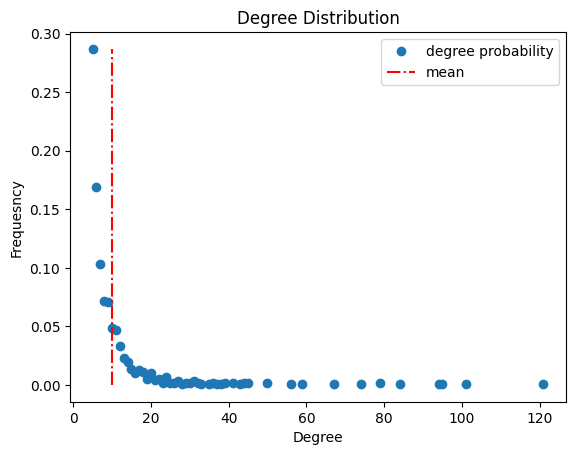

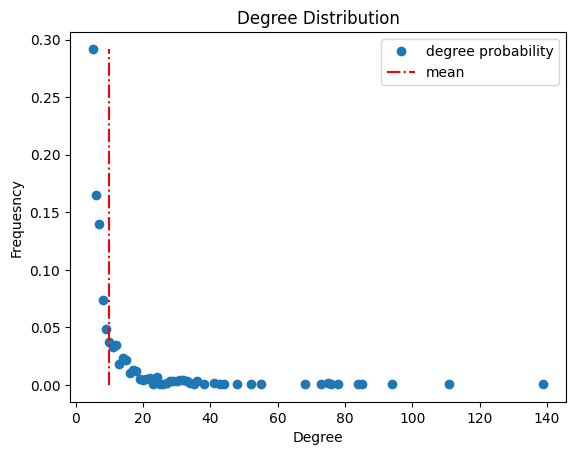

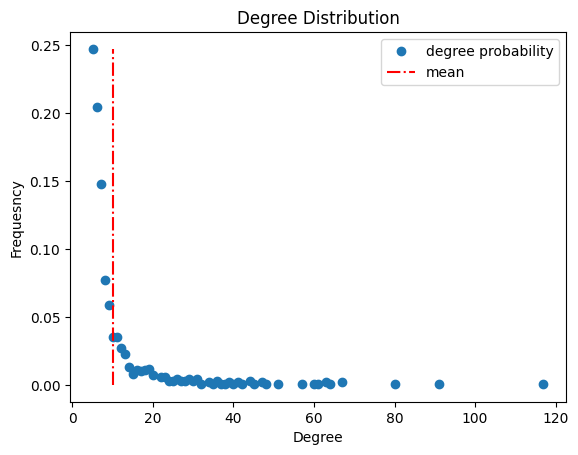

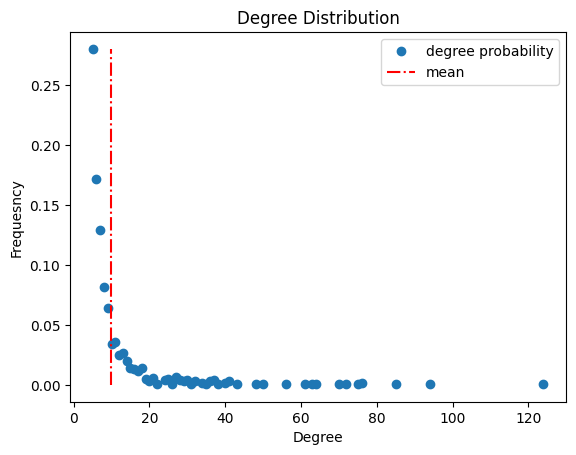

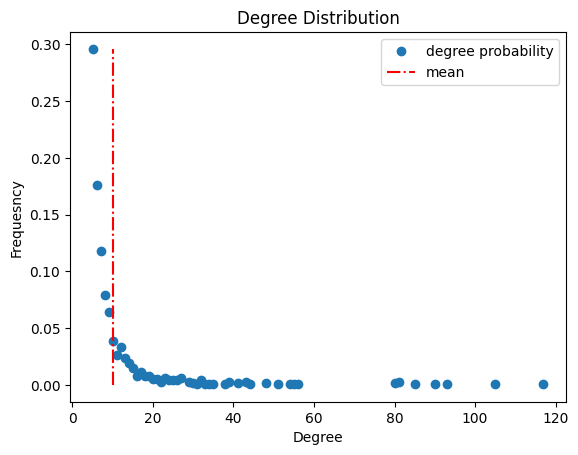

In [ ]:
for graph in scale_frees:
    degree_distribution(graph, style='o')

### log-log plot

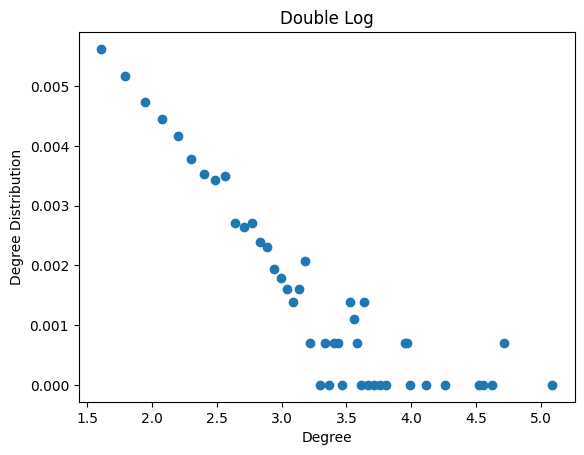

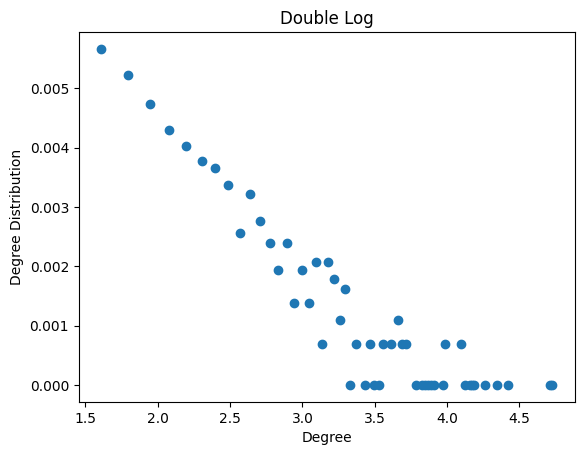

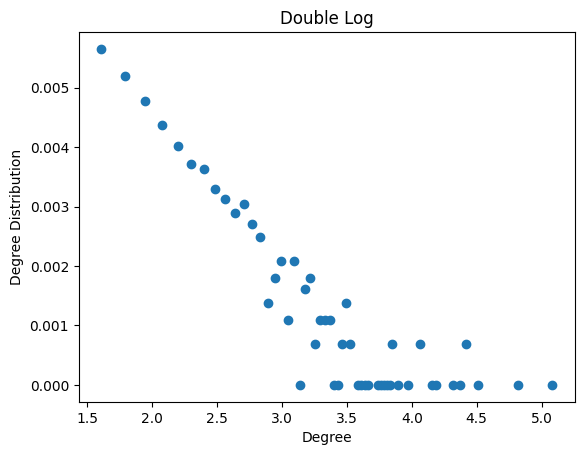

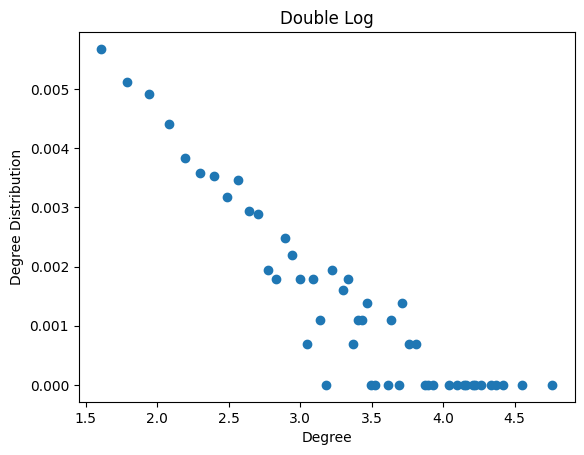

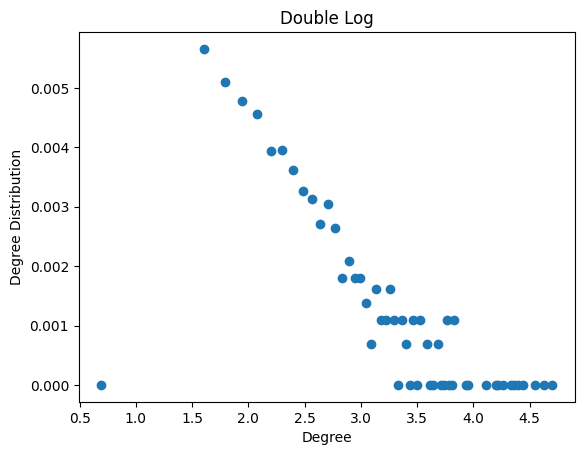

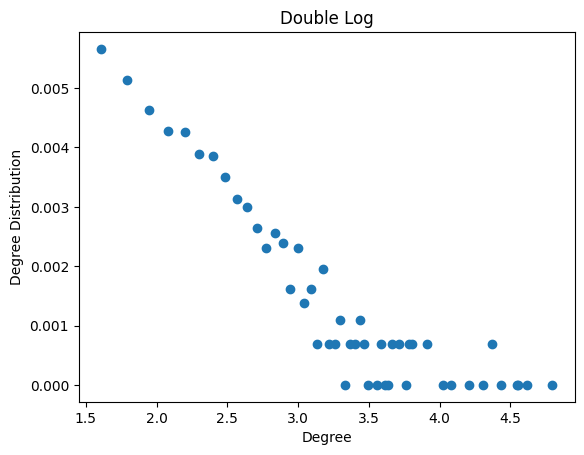

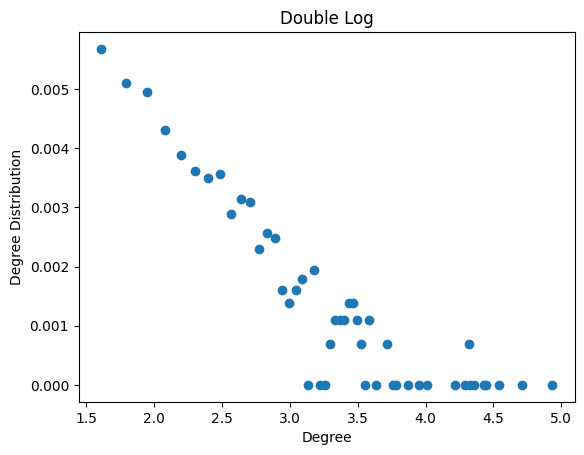

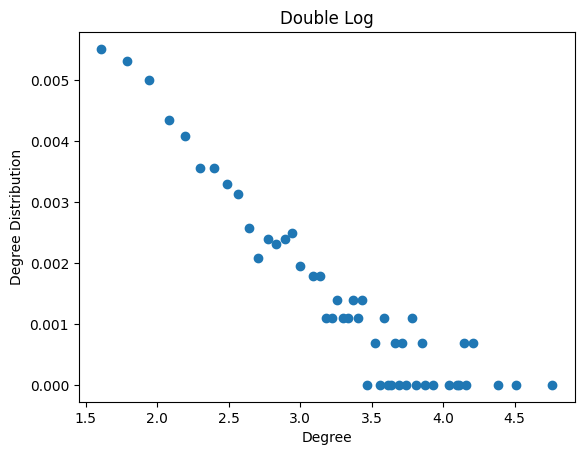

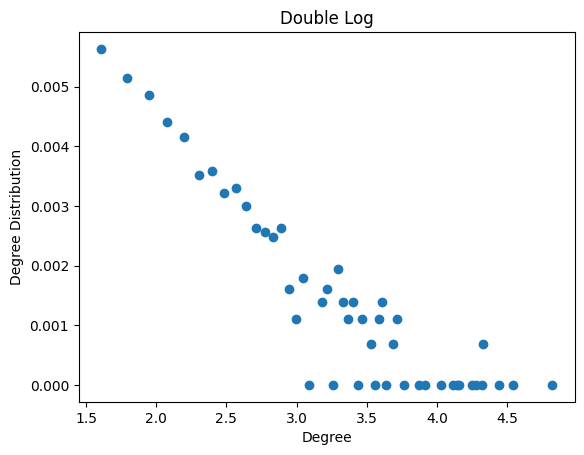

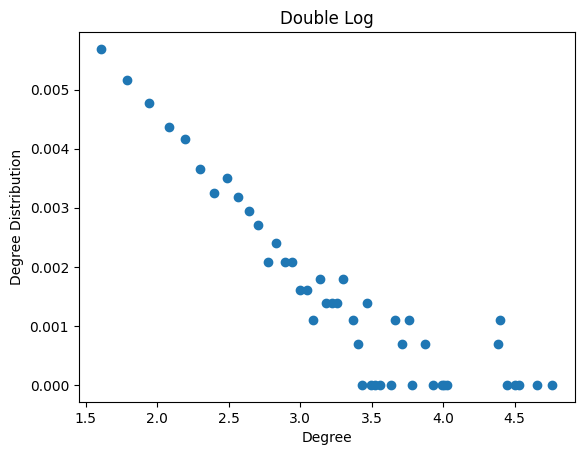

In [ ]:
for graph in scale_frees:
    double_log(graph, style='o')

# Random

In [ ]:
randoms = []
for i in range(GRAPH_NUMBER):
    print('graph no: ', i)
    graph = nx.erdos_renyi_graph(NODE_NUMBER, EDGE_PROBABILITY)
    randoms.append(graph)

graph no:  0
graph no:  1
graph no:  2
graph no:  3
graph no:  4
graph no:  5
graph no:  6
graph no:  7
graph no:  8
graph no:  9


### Degree Distribution

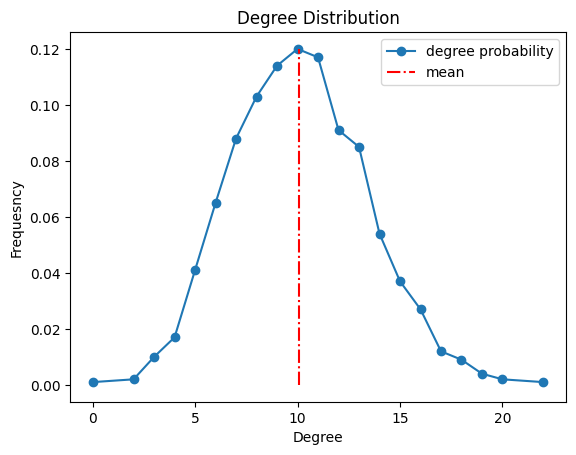

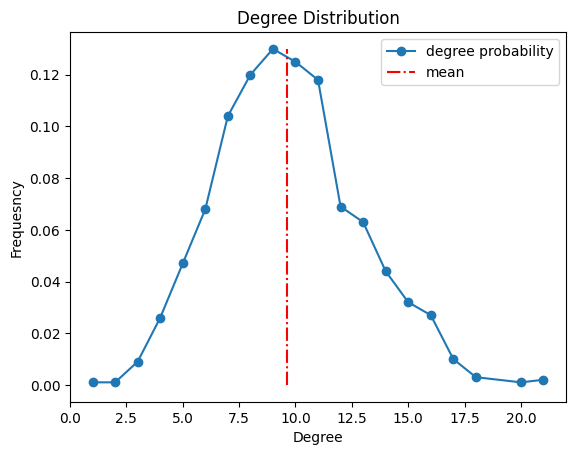

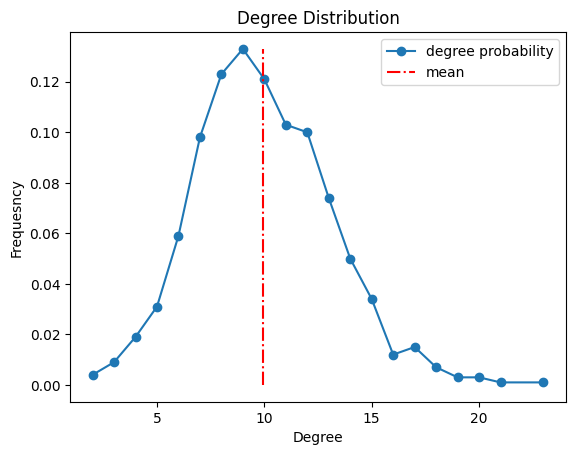

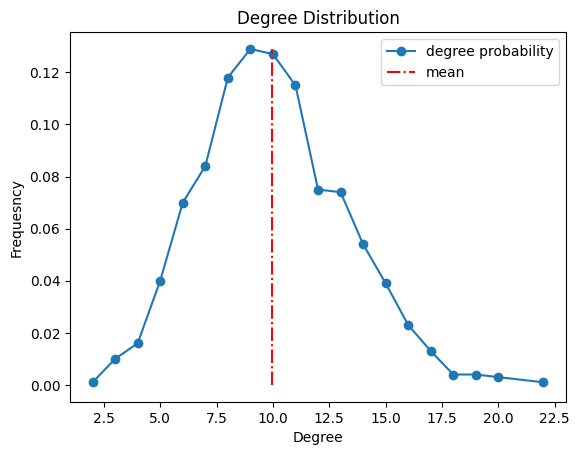

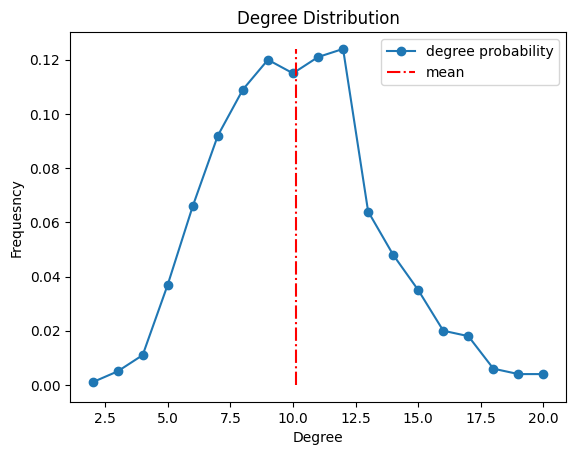

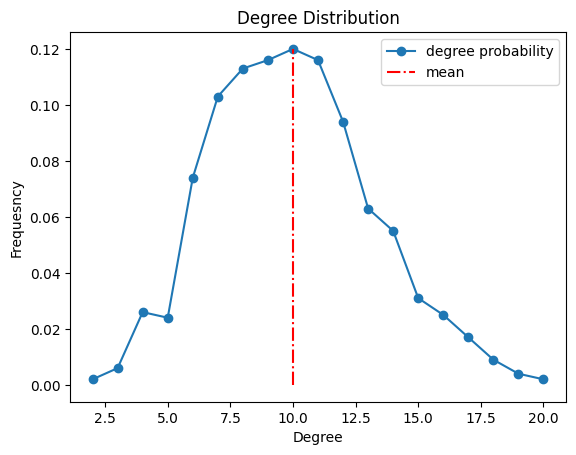

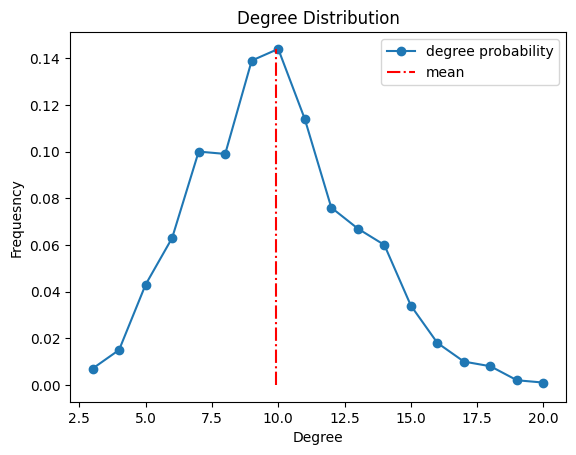

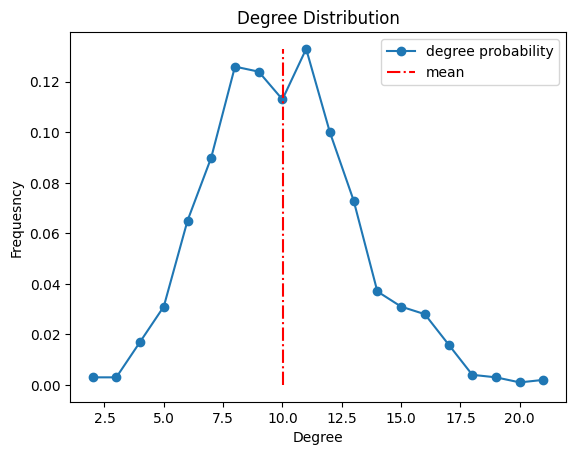

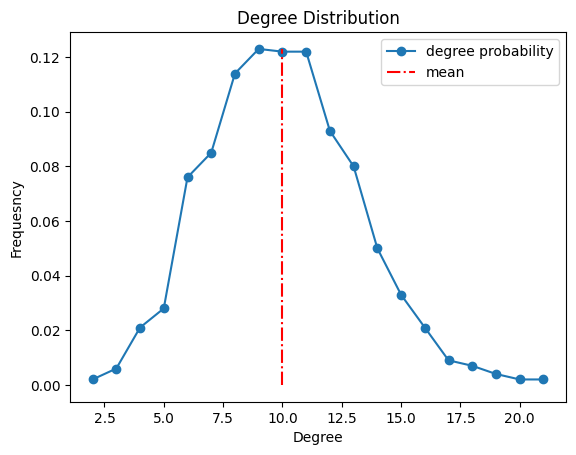

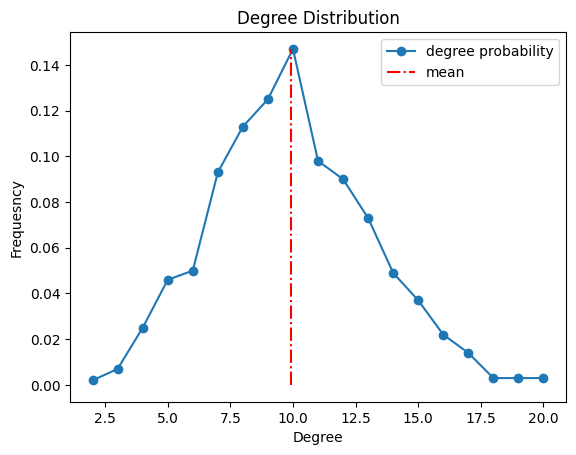

In [ ]:
for graph in randoms:
    degree_distribution(graph)

# Node Failure

### Small-WOrld

simulation no:  0
failure:  0.05
failure:  0.1
failure:  0.15
failure:  0.2
failure:  0.25
failure:  0.3
failure:  0.35
failure:  0.4
failure:  0.45
failure:  0.5
failure:  0.55
failure:  0.6
failure:  0.65
failure:  0.7
failure:  0.75


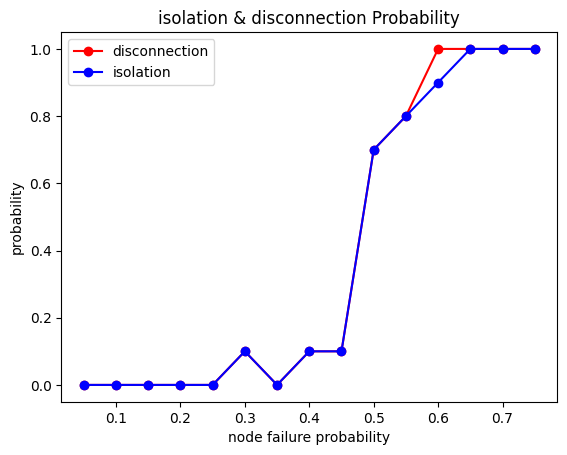

simulation no:  1
failure:  0.05
failure:  0.1
failure:  0.15
failure:  0.2
failure:  0.25
failure:  0.3
failure:  0.35
failure:  0.4
failure:  0.45
failure:  0.5
failure:  0.55
failure:  0.6
failure:  0.65
failure:  0.7
failure:  0.75


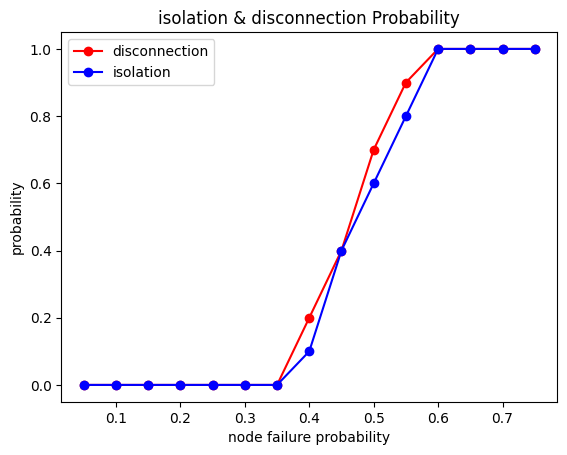

In [ ]:
small_world_node_isolations = []
small_world_node_disconnections = []

for i in range(SIMULATION_NUMBER):
    print('simulation no: ', i)
    isolation, disconnection = apply_failure(small_worlds, is_node_failure=True)
    small_world_node_isolations.append(isolation)
    small_world_node_disconnections.append(disconnection)

### Scale-Free

failure:  0.05
failure:  0.1
failure:  0.15
failure:  0.2
failure:  0.25
failure:  0.3
failure:  0.35
failure:  0.4
failure:  0.45
failure:  0.5
failure:  0.55
failure:  0.6
failure:  0.65
failure:  0.7
failure:  0.75


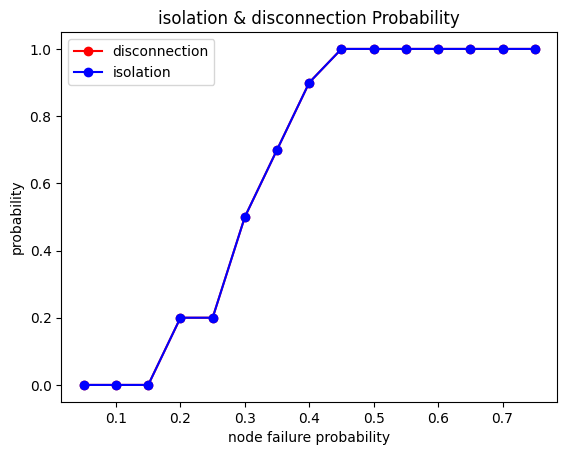

failure:  0.05
failure:  0.1
failure:  0.15
failure:  0.2
failure:  0.25
failure:  0.3
failure:  0.35
failure:  0.4
failure:  0.45
failure:  0.5
failure:  0.55
failure:  0.6
failure:  0.65
failure:  0.7
failure:  0.75


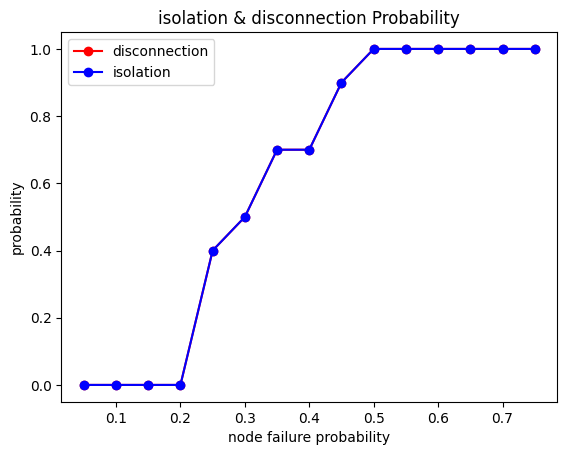

In [ ]:
scale_free_node_isolations = []
scale_free_node_disconnections = []

for i in range(SIMULATION_NUMBER):
    isolation, disconnection = apply_failure(scale_frees, is_node_failure=True)
    scale_free_node_isolations.append(isolation)
    scale_free_node_disconnections.append(disconnection)

### Random

failure:  0.05
failure:  0.1
failure:  0.15
failure:  0.2
failure:  0.25
failure:  0.3
failure:  0.35
failure:  0.4
failure:  0.45
failure:  0.5
failure:  0.55
failure:  0.6
failure:  0.65
failure:  0.7
failure:  0.75


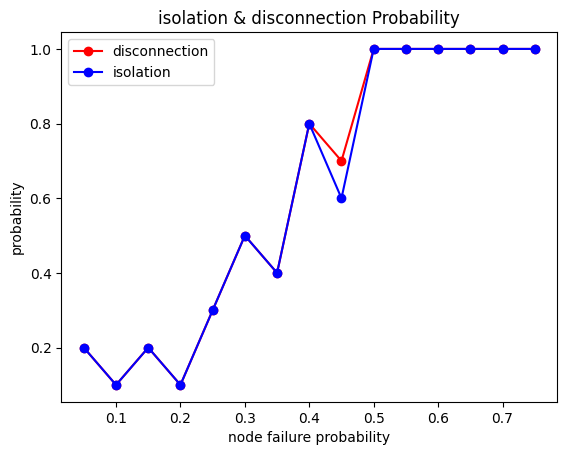

failure:  0.05
failure:  0.1
failure:  0.15
failure:  0.2
failure:  0.25
failure:  0.3
failure:  0.35
failure:  0.4
failure:  0.45
failure:  0.5
failure:  0.55
failure:  0.6
failure:  0.65
failure:  0.7
failure:  0.75


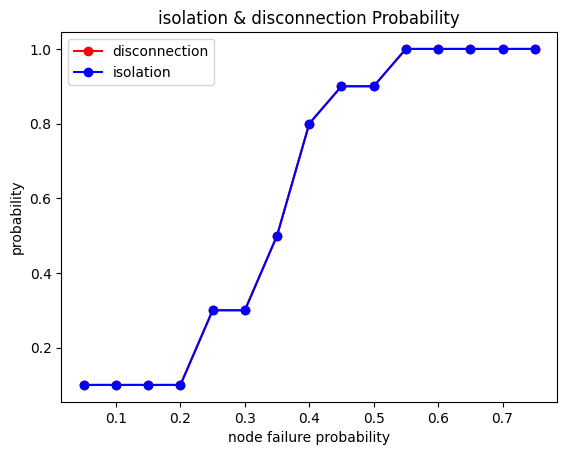

In [ ]:
random_node_isolations = []
random_node_disconnections = []

for i in range(SIMULATION_NUMBER):
    isolation, disconnection = apply_failure(randoms, is_node_failure=True)
    random_node_isolations.append(isolation)
    random_node_disconnections.append(disconnection)

# Edge Failure

### Small-World

simulation no:  0
failure:  0.05
failure:  0.1
failure:  0.15
failure:  0.2
failure:  0.25
failure:  0.3
failure:  0.35
failure:  0.4
failure:  0.45
failure:  0.5
failure:  0.55
failure:  0.6
failure:  0.65
failure:  0.7
failure:  0.75


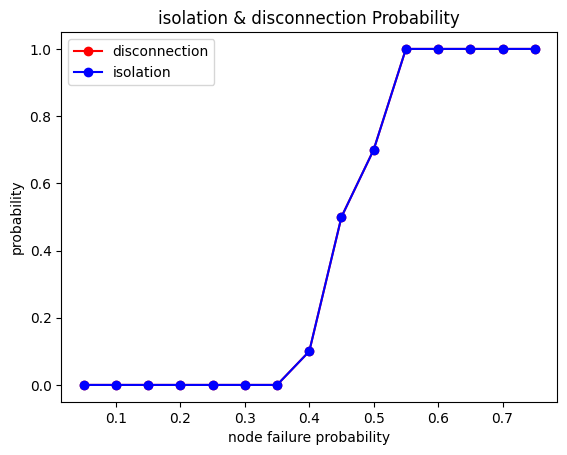

simulation no:  1
failure:  0.05
failure:  0.1
failure:  0.15
failure:  0.2
failure:  0.25
failure:  0.3
failure:  0.35
failure:  0.4
failure:  0.45
failure:  0.5
failure:  0.55
failure:  0.6
failure:  0.65
failure:  0.7
failure:  0.75


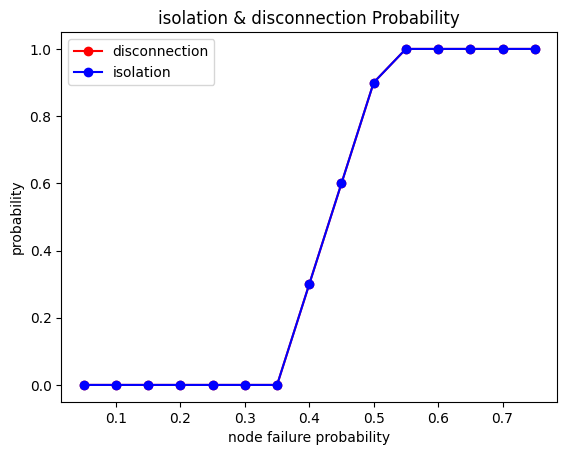

In [ ]:
small_world_edge_isolations = []
small_world_edge_disconnections = []

for i in range(SIMULATION_NUMBER):
    print('simulation no: ', i)
#     isolation, disconnection = apply_failure(random.sample(small_worlds, 20), is_node_failure=False)
    isolation, disconnection = apply_failure(small_worlds, is_node_failure=False)
    small_world_edge_isolations.append(isolation)
    small_world_edge_disconnections.append(disconnection)

### Scale-Free

simulation no:  0
failure:  0.05
failure:  0.1
failure:  0.15
failure:  0.2
failure:  0.25
failure:  0.3
failure:  0.35
failure:  0.4
failure:  0.45
failure:  0.5
failure:  0.55
failure:  0.6
failure:  0.65
failure:  0.7
failure:  0.75


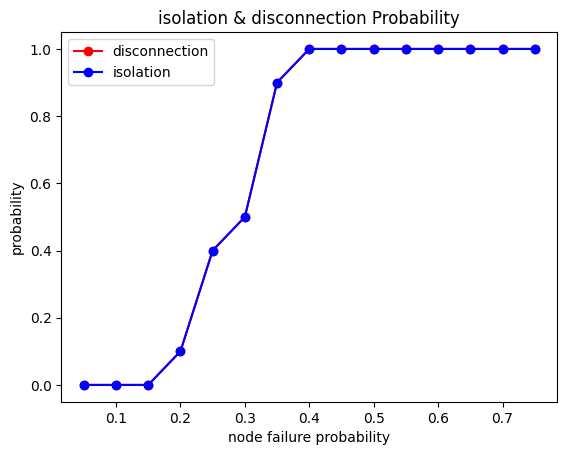

simulation no:  1
failure:  0.05
failure:  0.1
failure:  0.15
failure:  0.2
failure:  0.25
failure:  0.3
failure:  0.35
failure:  0.4
failure:  0.45
failure:  0.5
failure:  0.55
failure:  0.6
failure:  0.65
failure:  0.7
failure:  0.75


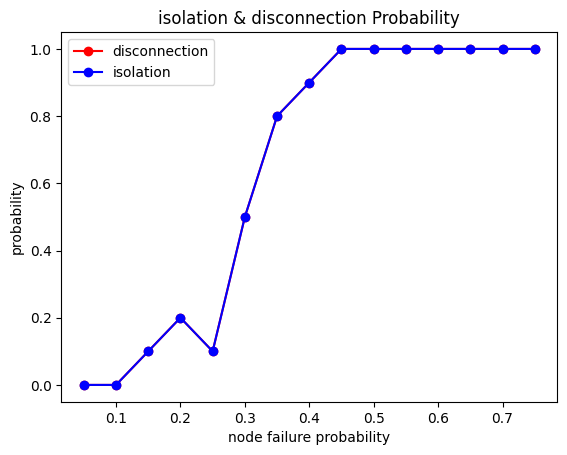

In [ ]:
scale_free_edge_isolations = []
scale_free_edge_disconnections = []

for i in range(SIMULATION_NUMBER):
    print('simulation no: ', i)
#     isolation, disconnection = apply_failure(random.sample(scale_frees, 20), is_node_failure=False)
    isolation, disconnection = apply_failure(scale_frees, is_node_failure=False)
    scale_free_edge_isolations.append(isolation)
    scale_free_edge_disconnections.append(disconnection)

### Random

simulation no:  0
failure:  0.05
failure:  0.1
failure:  0.15
failure:  0.2
failure:  0.25
failure:  0.3
failure:  0.35
failure:  0.4
failure:  0.45
failure:  0.5
failure:  0.55
failure:  0.6
failure:  0.65
failure:  0.7
failure:  0.75


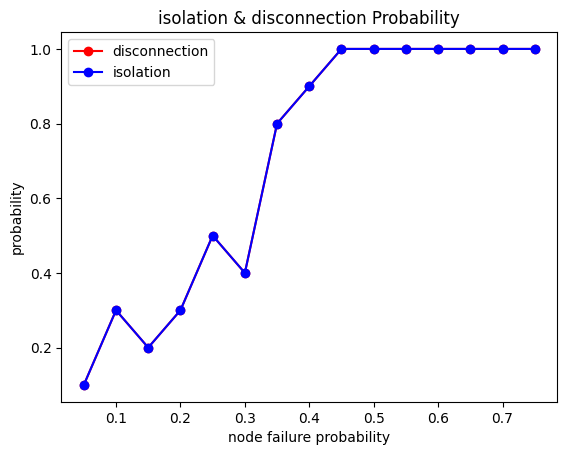

simulation no:  1
failure:  0.05
failure:  0.1
failure:  0.15
failure:  0.2
failure:  0.25
failure:  0.3
failure:  0.35
failure:  0.4
failure:  0.45
failure:  0.5
failure:  0.55
failure:  0.6
failure:  0.65
failure:  0.7
failure:  0.75


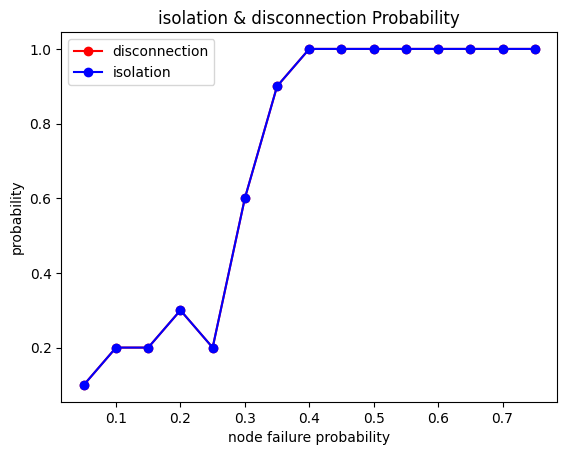

In [ ]:
random_edge_isolations = []
random_edge_disconnections = []

for i in range(SIMULATION_NUMBER):
    print('simulation no: ', i)
#     isolation, disconnection = apply_failure(random.sample(randoms, 20), is_node_failure=False)
    isolation, disconnection = apply_failure(randoms, is_node_failure=False)
    random_edge_isolations.append(isolation)
    random_edge_disconnections.append(disconnection)

# Comparison

### node-isolation

small-world node isolation probabilities, mean is:  0.0
small-world node isolation probabilities, std is:  0.0
scale-free node isolation probabilities, mean is:  0.0
scale-free node isolation probabilities, std is:  0.0
random node isolation probabilities, mean is:  0.15000000000000002
random node isolation probabilities, std is:  0.05


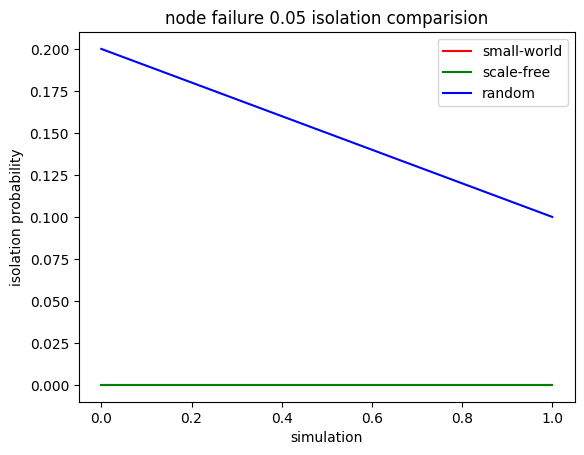

[[0.0, 0.0], [0.0, 0.0], [0.2, 0.1]]
small-world node isolation probabilities, mean is:  0.0
small-world node isolation probabilities, std is:  0.0
scale-free node isolation probabilities, mean is:  0.0
scale-free node isolation probabilities, std is:  0.0
random node isolation probabilities, mean is:  0.1
random node isolation probabilities, std is:  0.0


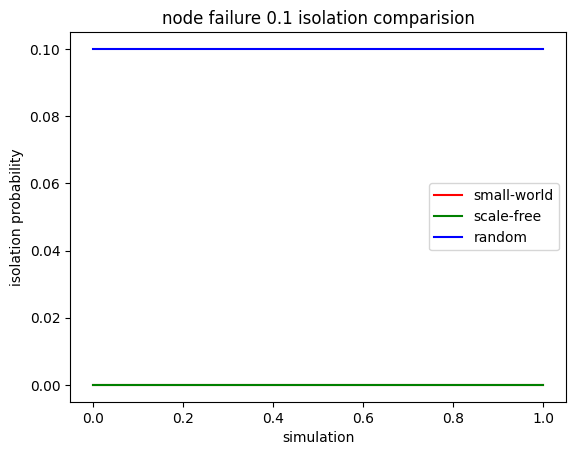

[[0.0, 0.0], [0.0, 0.0], [0.1, 0.1]]
small-world node isolation probabilities, mean is:  0.0
small-world node isolation probabilities, std is:  0.0
scale-free node isolation probabilities, mean is:  0.0
scale-free node isolation probabilities, std is:  0.0
random node isolation probabilities, mean is:  0.15000000000000002
random node isolation probabilities, std is:  0.05


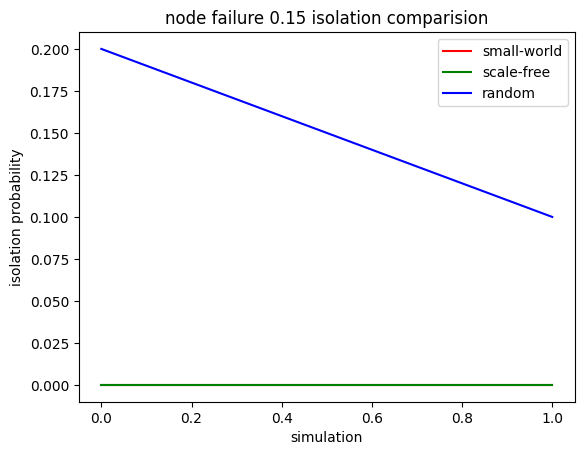

[[0.0, 0.0], [0.0, 0.0], [0.2, 0.1]]
small-world node isolation probabilities, mean is:  0.0
small-world node isolation probabilities, std is:  0.0
scale-free node isolation probabilities, mean is:  0.1
scale-free node isolation probabilities, std is:  0.1
random node isolation probabilities, mean is:  0.1
random node isolation probabilities, std is:  0.0


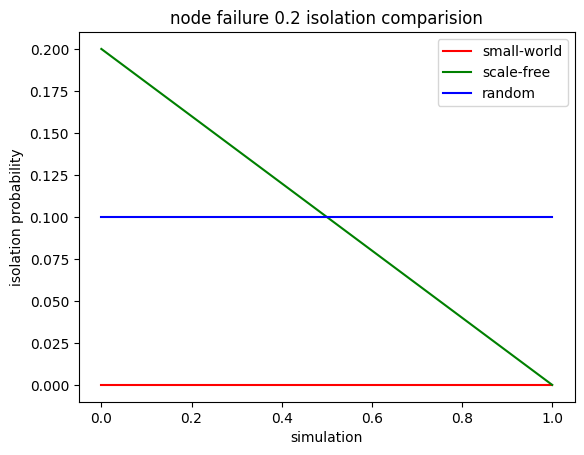

[[0.0, 0.0], [0.2, 0.0], [0.1, 0.1]]
small-world node isolation probabilities, mean is:  0.0
small-world node isolation probabilities, std is:  0.0
scale-free node isolation probabilities, mean is:  0.30000000000000004
scale-free node isolation probabilities, std is:  0.1
random node isolation probabilities, mean is:  0.3
random node isolation probabilities, std is:  0.0


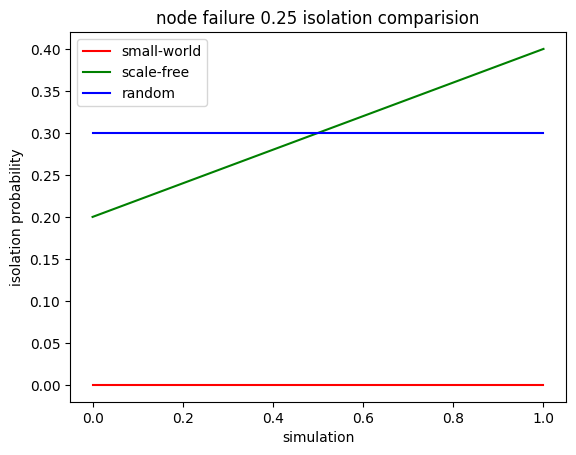

[[0.0, 0.0], [0.2, 0.4], [0.3, 0.3]]
small-world node isolation probabilities, mean is:  0.05
small-world node isolation probabilities, std is:  0.05
scale-free node isolation probabilities, mean is:  0.5
scale-free node isolation probabilities, std is:  0.0
random node isolation probabilities, mean is:  0.4
random node isolation probabilities, std is:  0.1


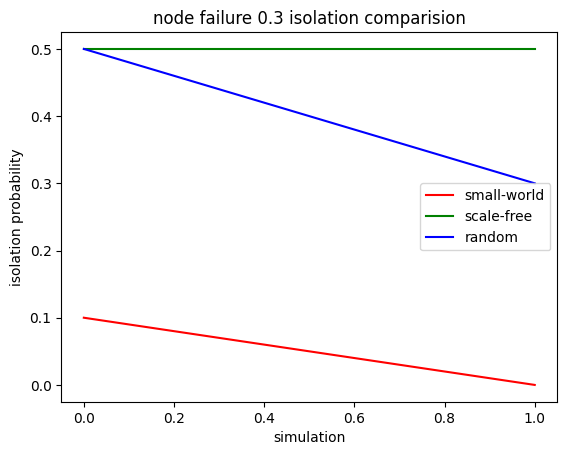

[[0.1, 0.0], [0.5, 0.5], [0.5, 0.3]]
small-world node isolation probabilities, mean is:  0.0
small-world node isolation probabilities, std is:  0.0
scale-free node isolation probabilities, mean is:  0.7
scale-free node isolation probabilities, std is:  0.0
random node isolation probabilities, mean is:  0.45
random node isolation probabilities, std is:  0.04999999999999999


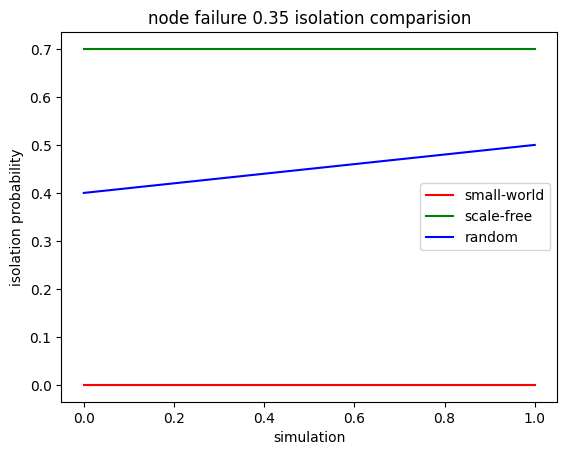

[[0.0, 0.0], [0.7, 0.7], [0.4, 0.5]]
small-world node isolation probabilities, mean is:  0.1
small-world node isolation probabilities, std is:  0.0
scale-free node isolation probabilities, mean is:  0.8
scale-free node isolation probabilities, std is:  0.10000000000000003
random node isolation probabilities, mean is:  0.8
random node isolation probabilities, std is:  0.0


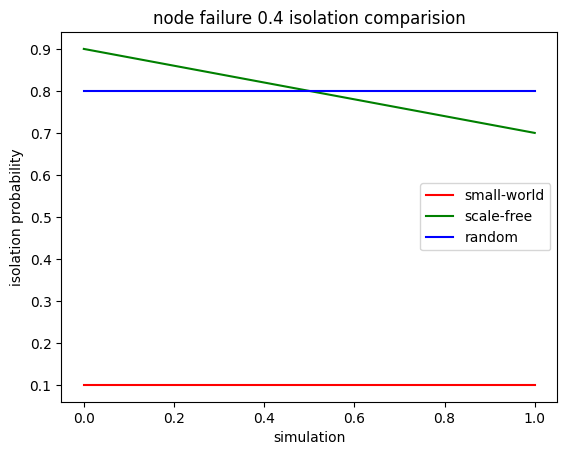

[[0.1, 0.1], [0.9, 0.7], [0.8, 0.8]]
small-world node isolation probabilities, mean is:  0.25
small-world node isolation probabilities, std is:  0.15000000000000002
scale-free node isolation probabilities, mean is:  0.95
scale-free node isolation probabilities, std is:  0.04999999999999999
random node isolation probabilities, mean is:  0.75
random node isolation probabilities, std is:  0.15000000000000002


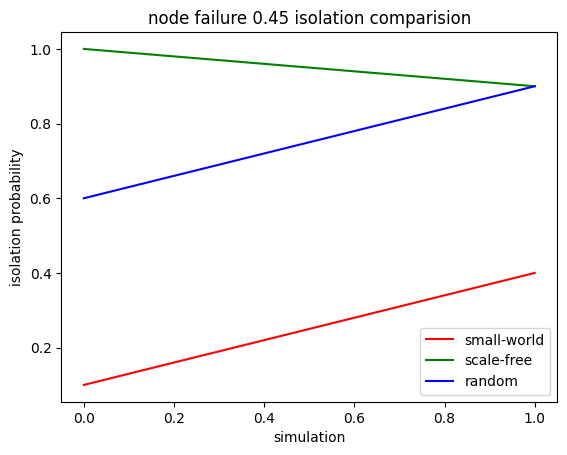

[[0.1, 0.4], [1.0, 0.9], [0.6, 0.9]]
small-world node isolation probabilities, mean is:  0.6499999999999999
small-world node isolation probabilities, std is:  0.04999999999999999
scale-free node isolation probabilities, mean is:  1.0
scale-free node isolation probabilities, std is:  0.0
random node isolation probabilities, mean is:  0.95
random node isolation probabilities, std is:  0.04999999999999999


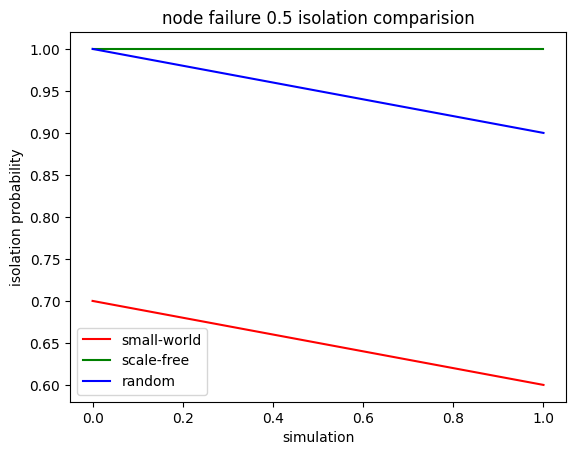

[[0.7, 0.6], [1.0, 1.0], [1.0, 0.9]]
small-world node isolation probabilities, mean is:  0.8
small-world node isolation probabilities, std is:  0.0
scale-free node isolation probabilities, mean is:  1.0
scale-free node isolation probabilities, std is:  0.0
random node isolation probabilities, mean is:  1.0
random node isolation probabilities, std is:  0.0


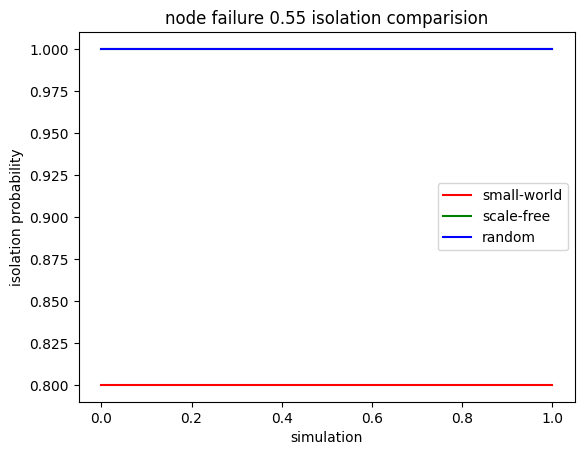

[[0.8, 0.8], [1.0, 1.0], [1.0, 1.0]]
small-world node isolation probabilities, mean is:  0.95
small-world node isolation probabilities, std is:  0.04999999999999999
scale-free node isolation probabilities, mean is:  1.0
scale-free node isolation probabilities, std is:  0.0
random node isolation probabilities, mean is:  1.0
random node isolation probabilities, std is:  0.0


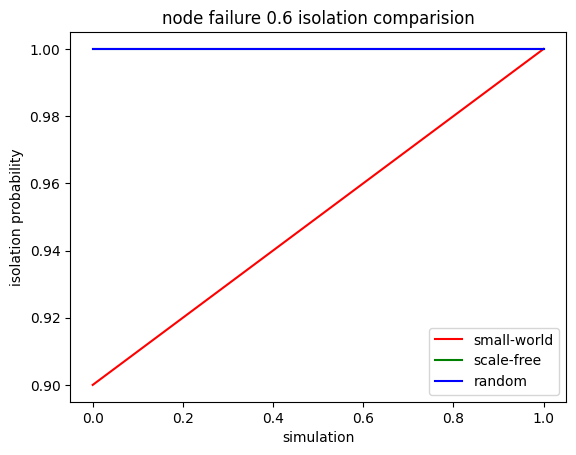

[[0.9, 1.0], [1.0, 1.0], [1.0, 1.0]]
small-world node isolation probabilities, mean is:  1.0
small-world node isolation probabilities, std is:  0.0
scale-free node isolation probabilities, mean is:  1.0
scale-free node isolation probabilities, std is:  0.0
random node isolation probabilities, mean is:  1.0
random node isolation probabilities, std is:  0.0


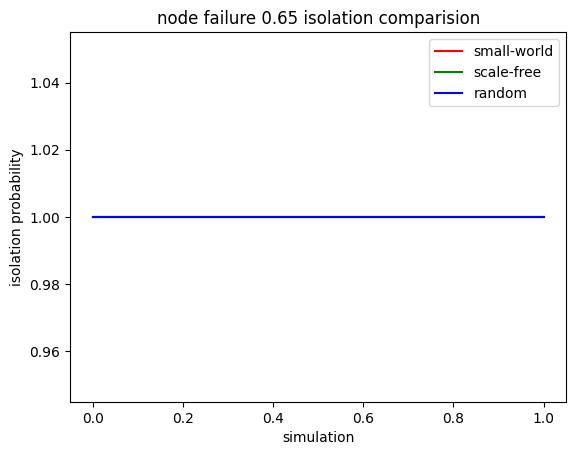

[[1.0, 1.0], [1.0, 1.0], [1.0, 1.0]]
small-world node isolation probabilities, mean is:  1.0
small-world node isolation probabilities, std is:  0.0
scale-free node isolation probabilities, mean is:  1.0
scale-free node isolation probabilities, std is:  0.0
random node isolation probabilities, mean is:  1.0
random node isolation probabilities, std is:  0.0


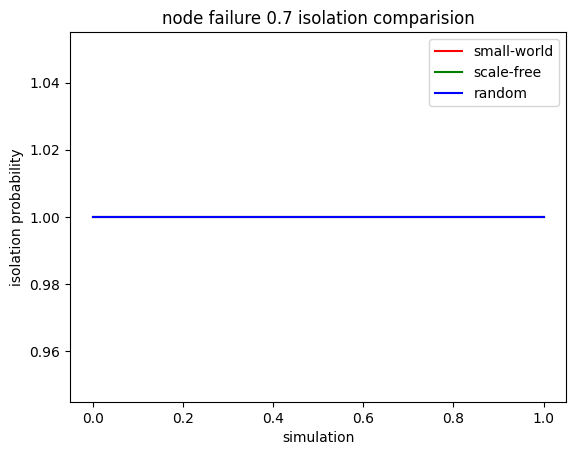

[[1.0, 1.0], [1.0, 1.0], [1.0, 1.0]]
small-world node isolation probabilities, mean is:  1.0
small-world node isolation probabilities, std is:  0.0
scale-free node isolation probabilities, mean is:  1.0
scale-free node isolation probabilities, std is:  0.0
random node isolation probabilities, mean is:  1.0
random node isolation probabilities, std is:  0.0


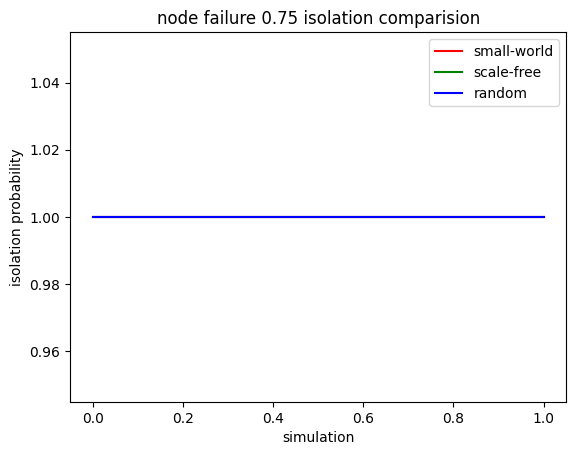

[[1.0, 1.0], [1.0, 1.0], [1.0, 1.0]]


In [ ]:
lables = ['small-world', 'scale-free', 'random']
datas = [small_world_node_isolations, scale_free_node_isolations, random_node_isolations]
compare(datas, lables, failure_kind='node', result_kind='isolation', style='-')

### node-disconnection

small-world node disconnection probabilities, mean is:  0.0
small-world node disconnection probabilities, std is:  0.0
scale-free node disconnection probabilities, mean is:  0.0
scale-free node disconnection probabilities, std is:  0.0
random node disconnection probabilities, mean is:  0.15000000000000002
random node disconnection probabilities, std is:  0.05


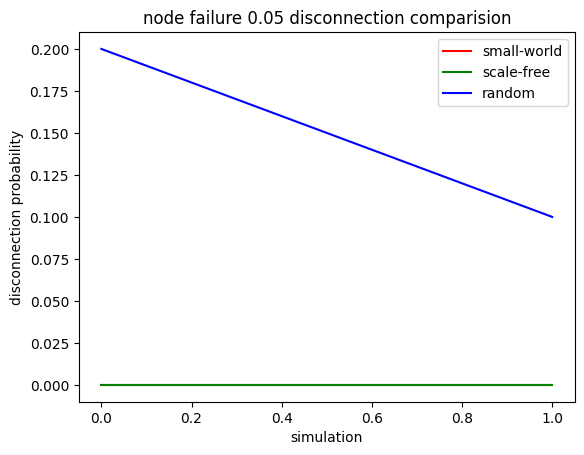

[[0.0, 0.0], [0.0, 0.0], [0.2, 0.1]]
small-world node disconnection probabilities, mean is:  0.0
small-world node disconnection probabilities, std is:  0.0
scale-free node disconnection probabilities, mean is:  0.0
scale-free node disconnection probabilities, std is:  0.0
random node disconnection probabilities, mean is:  0.1
random node disconnection probabilities, std is:  0.0


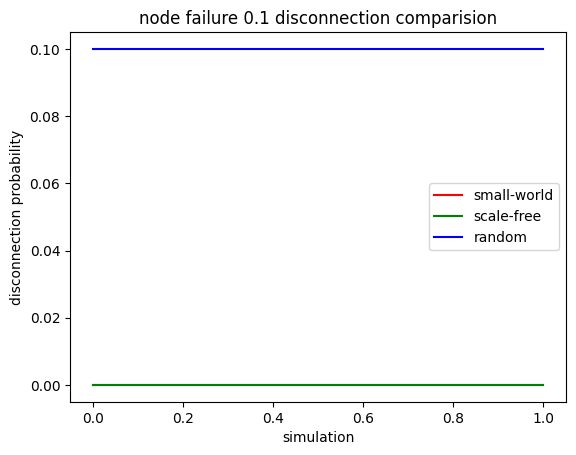

[[0.0, 0.0], [0.0, 0.0], [0.1, 0.1]]
small-world node disconnection probabilities, mean is:  0.0
small-world node disconnection probabilities, std is:  0.0
scale-free node disconnection probabilities, mean is:  0.0
scale-free node disconnection probabilities, std is:  0.0
random node disconnection probabilities, mean is:  0.15000000000000002
random node disconnection probabilities, std is:  0.05


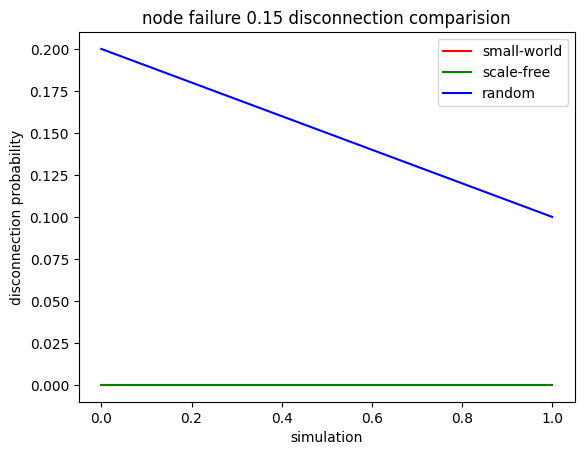

[[0.0, 0.0], [0.0, 0.0], [0.2, 0.1]]
small-world node disconnection probabilities, mean is:  0.0
small-world node disconnection probabilities, std is:  0.0
scale-free node disconnection probabilities, mean is:  0.1
scale-free node disconnection probabilities, std is:  0.1
random node disconnection probabilities, mean is:  0.1
random node disconnection probabilities, std is:  0.0


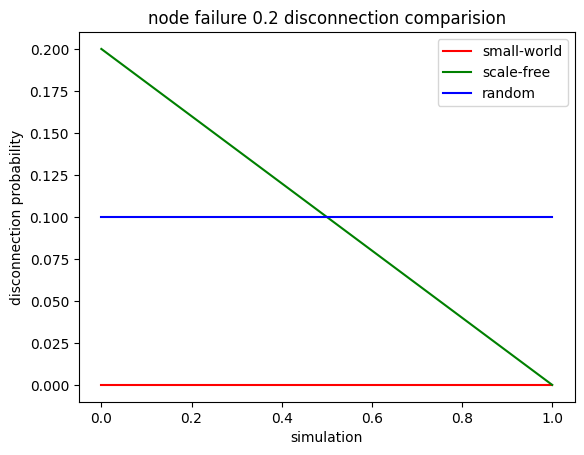

[[0.0, 0.0], [0.2, 0.0], [0.1, 0.1]]
small-world node disconnection probabilities, mean is:  0.0
small-world node disconnection probabilities, std is:  0.0
scale-free node disconnection probabilities, mean is:  0.30000000000000004
scale-free node disconnection probabilities, std is:  0.1
random node disconnection probabilities, mean is:  0.3
random node disconnection probabilities, std is:  0.0


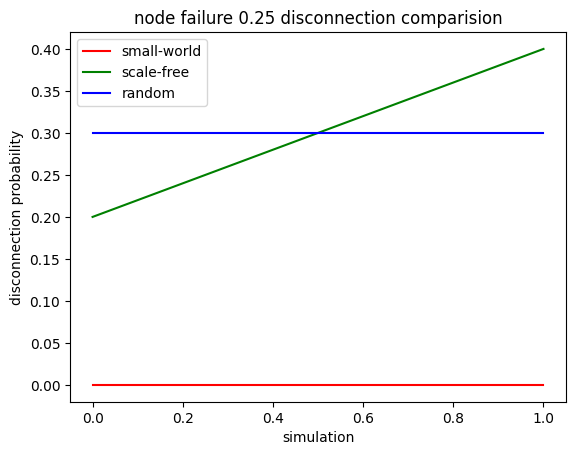

[[0.0, 0.0], [0.2, 0.4], [0.3, 0.3]]
small-world node disconnection probabilities, mean is:  0.05
small-world node disconnection probabilities, std is:  0.05
scale-free node disconnection probabilities, mean is:  0.5
scale-free node disconnection probabilities, std is:  0.0
random node disconnection probabilities, mean is:  0.4
random node disconnection probabilities, std is:  0.1


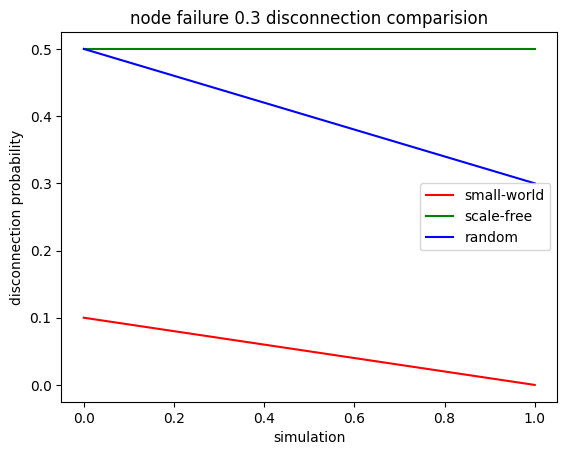

[[0.1, 0.0], [0.5, 0.5], [0.5, 0.3]]
small-world node disconnection probabilities, mean is:  0.0
small-world node disconnection probabilities, std is:  0.0
scale-free node disconnection probabilities, mean is:  0.7
scale-free node disconnection probabilities, std is:  0.0
random node disconnection probabilities, mean is:  0.45
random node disconnection probabilities, std is:  0.04999999999999999


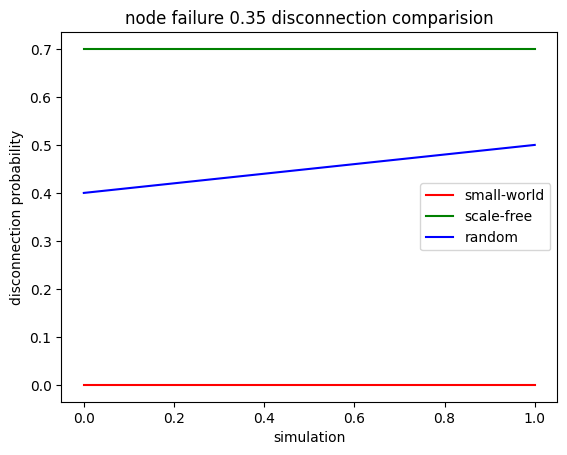

[[0.0, 0.0], [0.7, 0.7], [0.4, 0.5]]
small-world node disconnection probabilities, mean is:  0.15000000000000002
small-world node disconnection probabilities, std is:  0.05
scale-free node disconnection probabilities, mean is:  0.8
scale-free node disconnection probabilities, std is:  0.10000000000000003
random node disconnection probabilities, mean is:  0.8
random node disconnection probabilities, std is:  0.0


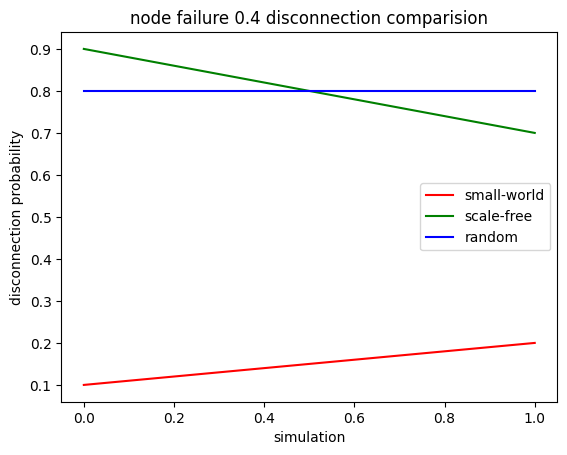

[[0.1, 0.2], [0.9, 0.7], [0.8, 0.8]]
small-world node disconnection probabilities, mean is:  0.25
small-world node disconnection probabilities, std is:  0.15000000000000002
scale-free node disconnection probabilities, mean is:  0.95
scale-free node disconnection probabilities, std is:  0.04999999999999999
random node disconnection probabilities, mean is:  0.8
random node disconnection probabilities, std is:  0.10000000000000003


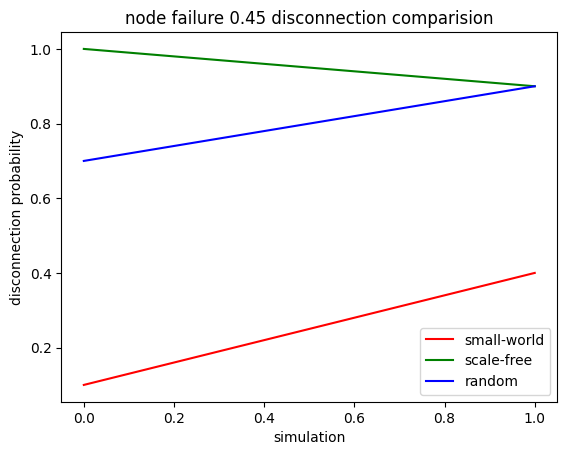

[[0.1, 0.4], [1.0, 0.9], [0.7, 0.9]]
small-world node disconnection probabilities, mean is:  0.7
small-world node disconnection probabilities, std is:  0.0
scale-free node disconnection probabilities, mean is:  1.0
scale-free node disconnection probabilities, std is:  0.0
random node disconnection probabilities, mean is:  0.95
random node disconnection probabilities, std is:  0.04999999999999999


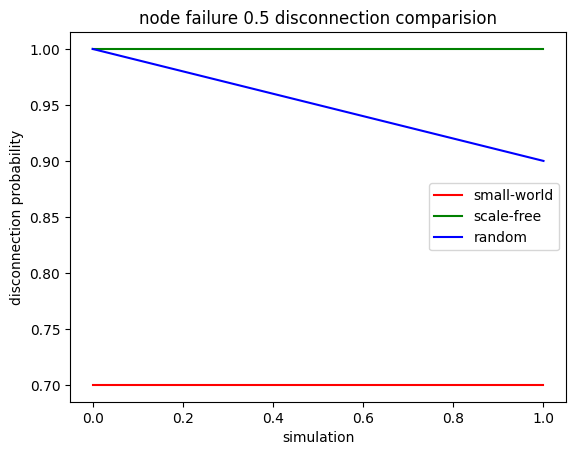

[[0.7, 0.7], [1.0, 1.0], [1.0, 0.9]]
small-world node disconnection probabilities, mean is:  0.8500000000000001
small-world node disconnection probabilities, std is:  0.04999999999999999
scale-free node disconnection probabilities, mean is:  1.0
scale-free node disconnection probabilities, std is:  0.0
random node disconnection probabilities, mean is:  1.0
random node disconnection probabilities, std is:  0.0


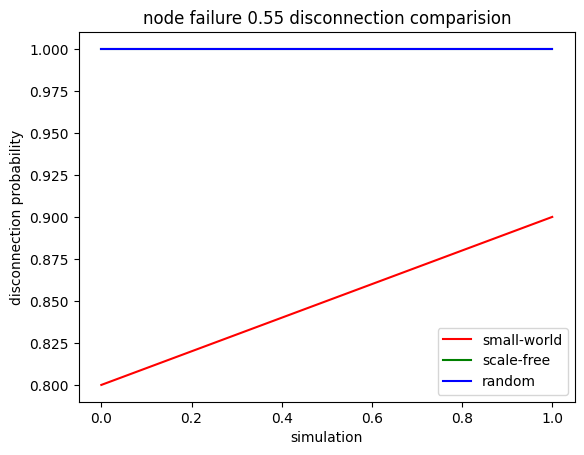

[[0.8, 0.9], [1.0, 1.0], [1.0, 1.0]]
small-world node disconnection probabilities, mean is:  1.0
small-world node disconnection probabilities, std is:  0.0
scale-free node disconnection probabilities, mean is:  1.0
scale-free node disconnection probabilities, std is:  0.0
random node disconnection probabilities, mean is:  1.0
random node disconnection probabilities, std is:  0.0


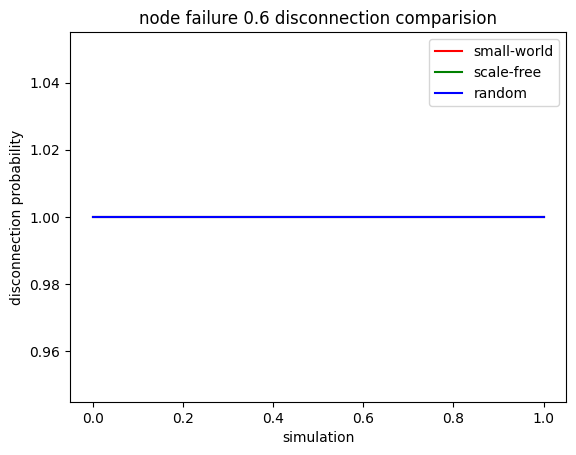

[[1.0, 1.0], [1.0, 1.0], [1.0, 1.0]]
small-world node disconnection probabilities, mean is:  1.0
small-world node disconnection probabilities, std is:  0.0
scale-free node disconnection probabilities, mean is:  1.0
scale-free node disconnection probabilities, std is:  0.0
random node disconnection probabilities, mean is:  1.0
random node disconnection probabilities, std is:  0.0


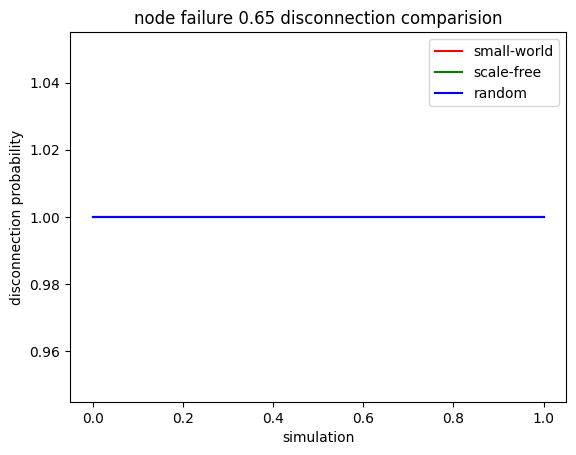

[[1.0, 1.0], [1.0, 1.0], [1.0, 1.0]]
small-world node disconnection probabilities, mean is:  1.0
small-world node disconnection probabilities, std is:  0.0
scale-free node disconnection probabilities, mean is:  1.0
scale-free node disconnection probabilities, std is:  0.0
random node disconnection probabilities, mean is:  1.0
random node disconnection probabilities, std is:  0.0


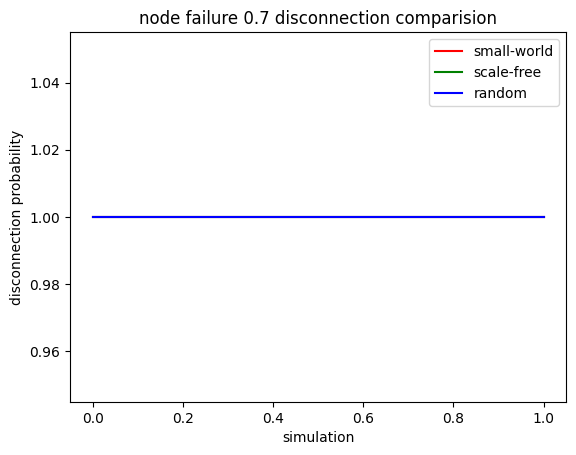

[[1.0, 1.0], [1.0, 1.0], [1.0, 1.0]]
small-world node disconnection probabilities, mean is:  1.0
small-world node disconnection probabilities, std is:  0.0
scale-free node disconnection probabilities, mean is:  1.0
scale-free node disconnection probabilities, std is:  0.0
random node disconnection probabilities, mean is:  1.0
random node disconnection probabilities, std is:  0.0


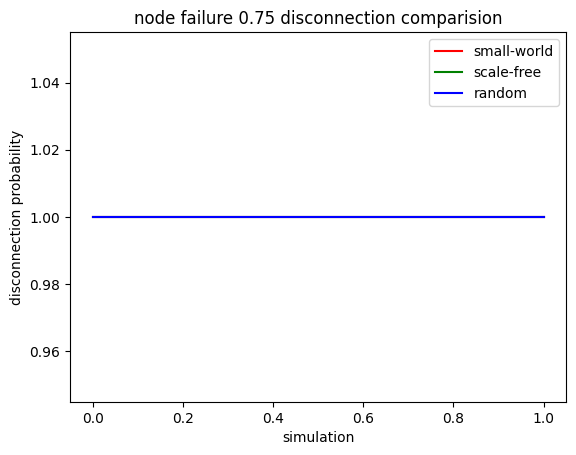

[[1.0, 1.0], [1.0, 1.0], [1.0, 1.0]]


In [ ]:
lables = ['small-world', 'scale-free', 'random']
datas = [small_world_node_disconnections, scale_free_node_disconnections, random_node_disconnections]
compare(datas, lables, failure_kind='node', result_kind='disconnection', style='-')

### edge-isolation

small-world edge isolation probabilities, mean is:  0.0
small-world edge isolation probabilities, std is:  0.0
scale-free edge isolation probabilities, mean is:  0.0
scale-free edge isolation probabilities, std is:  0.0
random edge isolation probabilities, mean is:  0.1
random edge isolation probabilities, std is:  0.0


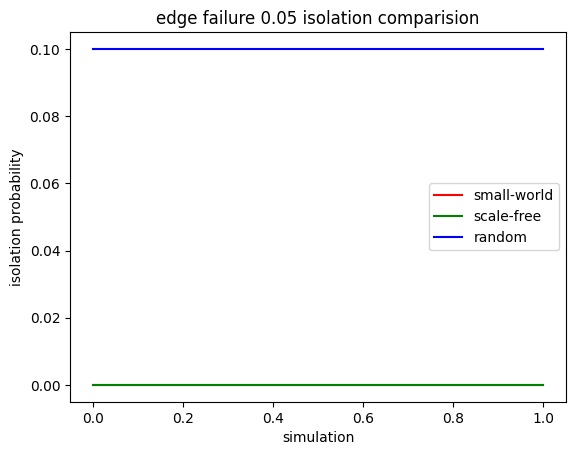

[[0.0, 0.0], [0.0, 0.0], [0.1, 0.1]]
small-world edge isolation probabilities, mean is:  0.0
small-world edge isolation probabilities, std is:  0.0
scale-free edge isolation probabilities, mean is:  0.0
scale-free edge isolation probabilities, std is:  0.0
random edge isolation probabilities, mean is:  0.25
random edge isolation probabilities, std is:  0.04999999999999999


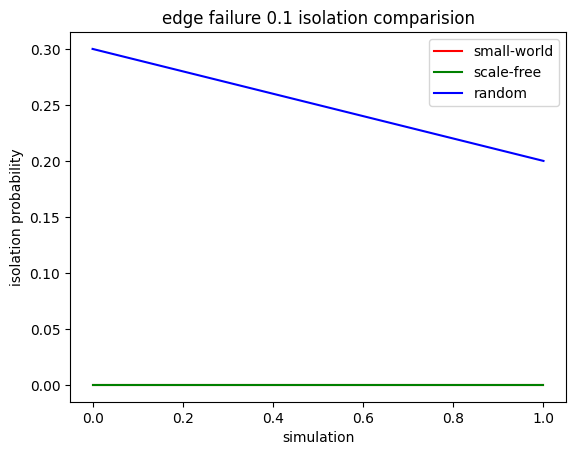

[[0.0, 0.0], [0.0, 0.0], [0.3, 0.2]]
small-world edge isolation probabilities, mean is:  0.0
small-world edge isolation probabilities, std is:  0.0
scale-free edge isolation probabilities, mean is:  0.05
scale-free edge isolation probabilities, std is:  0.05
random edge isolation probabilities, mean is:  0.2
random edge isolation probabilities, std is:  0.0


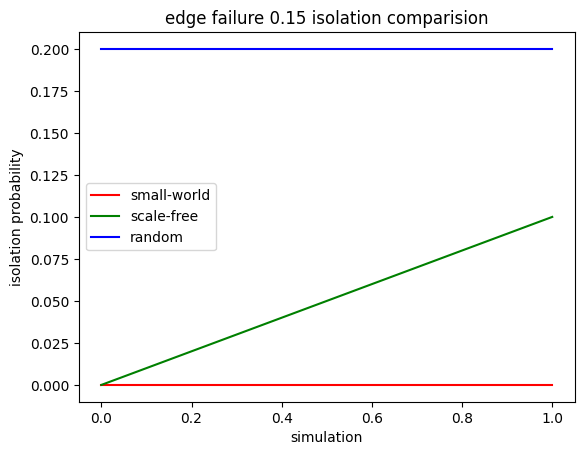

[[0.0, 0.0], [0.0, 0.1], [0.2, 0.2]]
small-world edge isolation probabilities, mean is:  0.0
small-world edge isolation probabilities, std is:  0.0
scale-free edge isolation probabilities, mean is:  0.15000000000000002
scale-free edge isolation probabilities, std is:  0.05
random edge isolation probabilities, mean is:  0.3
random edge isolation probabilities, std is:  0.0


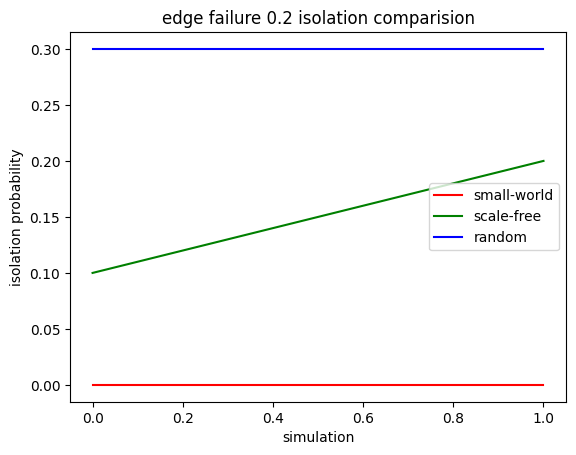

[[0.0, 0.0], [0.1, 0.2], [0.3, 0.3]]
small-world edge isolation probabilities, mean is:  0.0
small-world edge isolation probabilities, std is:  0.0
scale-free edge isolation probabilities, mean is:  0.25
scale-free edge isolation probabilities, std is:  0.15000000000000002
random edge isolation probabilities, mean is:  0.35
random edge isolation probabilities, std is:  0.15


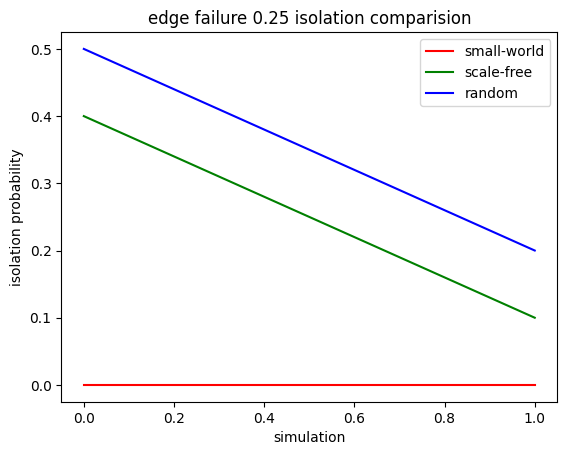

[[0.0, 0.0], [0.4, 0.1], [0.5, 0.2]]
small-world edge isolation probabilities, mean is:  0.0
small-world edge isolation probabilities, std is:  0.0
scale-free edge isolation probabilities, mean is:  0.5
scale-free edge isolation probabilities, std is:  0.0
random edge isolation probabilities, mean is:  0.5
random edge isolation probabilities, std is:  0.09999999999999998


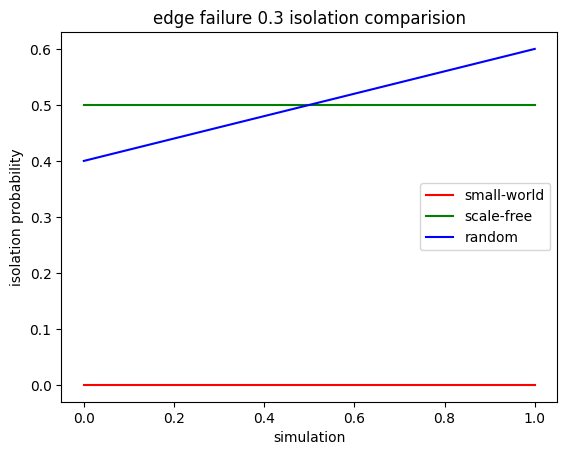

[[0.0, 0.0], [0.5, 0.5], [0.4, 0.6]]
small-world edge isolation probabilities, mean is:  0.0
small-world edge isolation probabilities, std is:  0.0
scale-free edge isolation probabilities, mean is:  0.8500000000000001
scale-free edge isolation probabilities, std is:  0.04999999999999999
random edge isolation probabilities, mean is:  0.8500000000000001
random edge isolation probabilities, std is:  0.04999999999999999


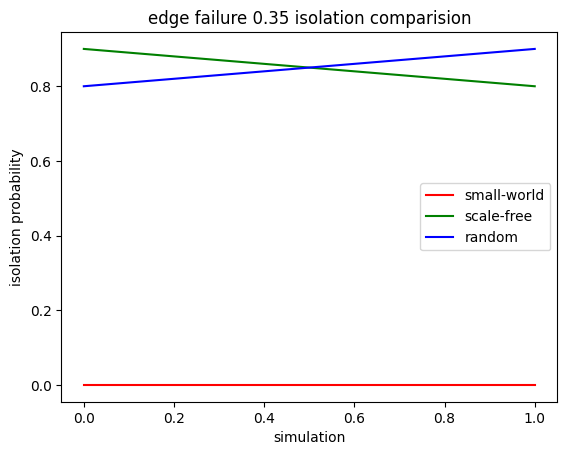

[[0.0, 0.0], [0.9, 0.8], [0.8, 0.9]]
small-world edge isolation probabilities, mean is:  0.2
small-world edge isolation probabilities, std is:  0.09999999999999999
scale-free edge isolation probabilities, mean is:  0.95
scale-free edge isolation probabilities, std is:  0.04999999999999999
random edge isolation probabilities, mean is:  0.95
random edge isolation probabilities, std is:  0.04999999999999999


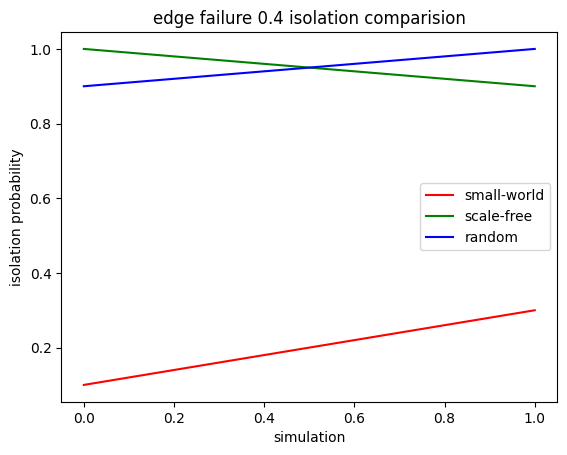

[[0.1, 0.3], [1.0, 0.9], [0.9, 1.0]]
small-world edge isolation probabilities, mean is:  0.55
small-world edge isolation probabilities, std is:  0.04999999999999999
scale-free edge isolation probabilities, mean is:  1.0
scale-free edge isolation probabilities, std is:  0.0
random edge isolation probabilities, mean is:  1.0
random edge isolation probabilities, std is:  0.0


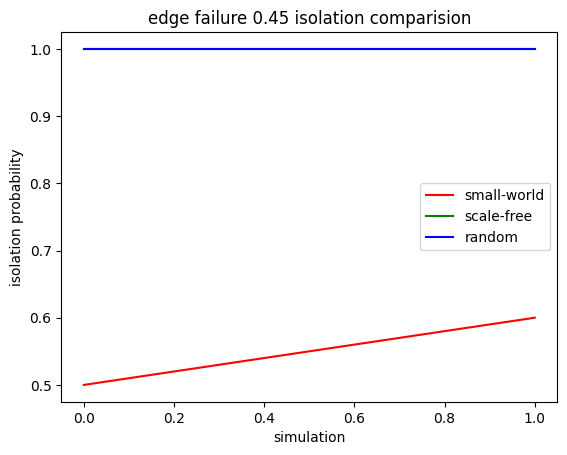

[[0.5, 0.6], [1.0, 1.0], [1.0, 1.0]]
small-world edge isolation probabilities, mean is:  0.8
small-world edge isolation probabilities, std is:  0.10000000000000003
scale-free edge isolation probabilities, mean is:  1.0
scale-free edge isolation probabilities, std is:  0.0
random edge isolation probabilities, mean is:  1.0
random edge isolation probabilities, std is:  0.0


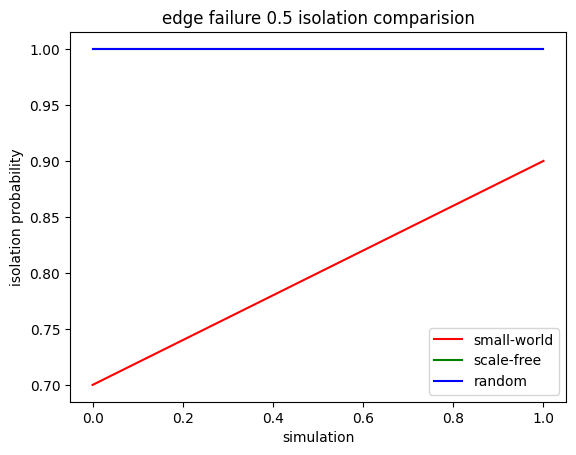

[[0.7, 0.9], [1.0, 1.0], [1.0, 1.0]]
small-world edge isolation probabilities, mean is:  1.0
small-world edge isolation probabilities, std is:  0.0
scale-free edge isolation probabilities, mean is:  1.0
scale-free edge isolation probabilities, std is:  0.0
random edge isolation probabilities, mean is:  1.0
random edge isolation probabilities, std is:  0.0


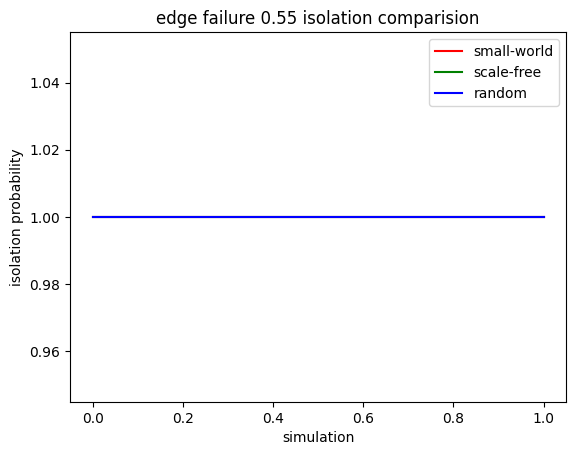

[[1.0, 1.0], [1.0, 1.0], [1.0, 1.0]]
small-world edge isolation probabilities, mean is:  1.0
small-world edge isolation probabilities, std is:  0.0
scale-free edge isolation probabilities, mean is:  1.0
scale-free edge isolation probabilities, std is:  0.0
random edge isolation probabilities, mean is:  1.0
random edge isolation probabilities, std is:  0.0


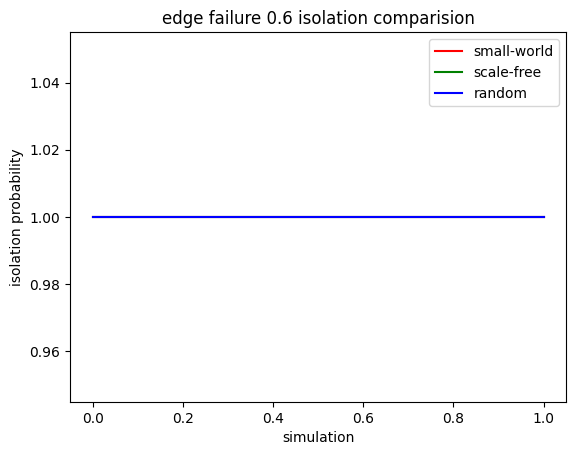

[[1.0, 1.0], [1.0, 1.0], [1.0, 1.0]]
small-world edge isolation probabilities, mean is:  1.0
small-world edge isolation probabilities, std is:  0.0
scale-free edge isolation probabilities, mean is:  1.0
scale-free edge isolation probabilities, std is:  0.0
random edge isolation probabilities, mean is:  1.0
random edge isolation probabilities, std is:  0.0


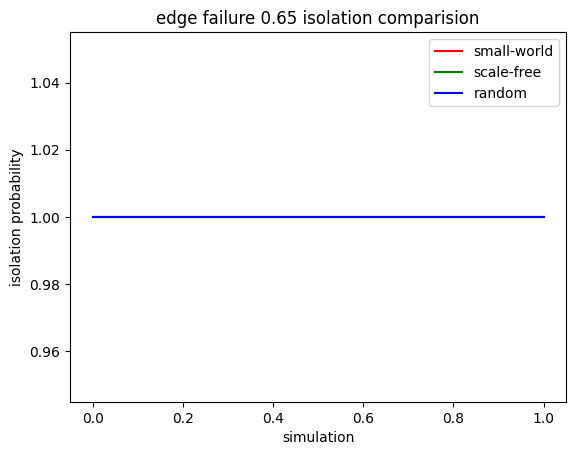

[[1.0, 1.0], [1.0, 1.0], [1.0, 1.0]]
small-world edge isolation probabilities, mean is:  1.0
small-world edge isolation probabilities, std is:  0.0
scale-free edge isolation probabilities, mean is:  1.0
scale-free edge isolation probabilities, std is:  0.0
random edge isolation probabilities, mean is:  1.0
random edge isolation probabilities, std is:  0.0


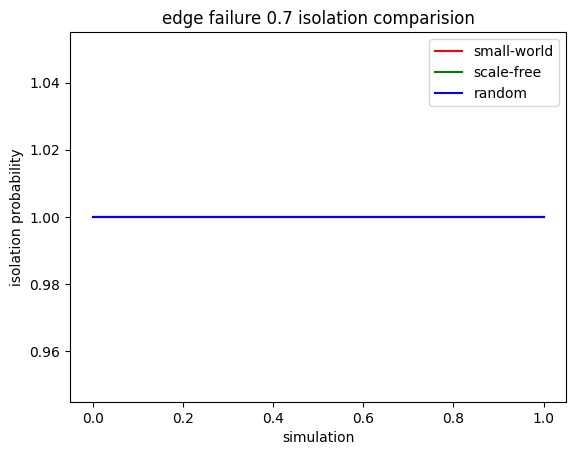

[[1.0, 1.0], [1.0, 1.0], [1.0, 1.0]]
small-world edge isolation probabilities, mean is:  1.0
small-world edge isolation probabilities, std is:  0.0
scale-free edge isolation probabilities, mean is:  1.0
scale-free edge isolation probabilities, std is:  0.0
random edge isolation probabilities, mean is:  1.0
random edge isolation probabilities, std is:  0.0


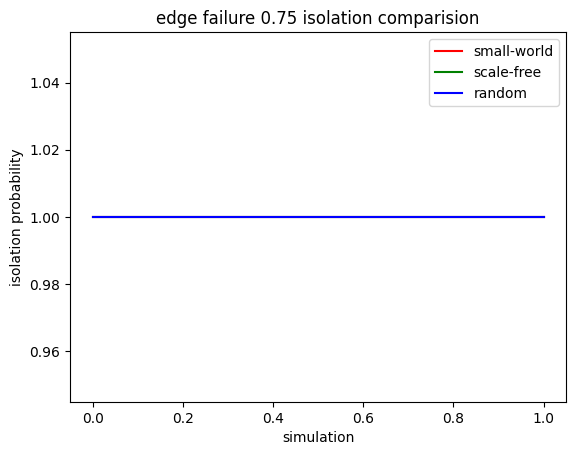

[[1.0, 1.0], [1.0, 1.0], [1.0, 1.0]]


In [ ]:
lables = ['small-world', 'scale-free', 'random']
datas = [small_world_edge_isolations, scale_free_edge_isolations, random_edge_isolations]
compare(datas, lables, failure_kind='edge', result_kind='isolation', style='-')

### edge-disconnection

small-world edge disconnection probabilities, mean is:  0.0
small-world edge disconnection probabilities, std is:  0.0
scale-free edge disconnection probabilities, mean is:  0.0
scale-free edge disconnection probabilities, std is:  0.0
random edge disconnection probabilities, mean is:  0.1
random edge disconnection probabilities, std is:  0.0


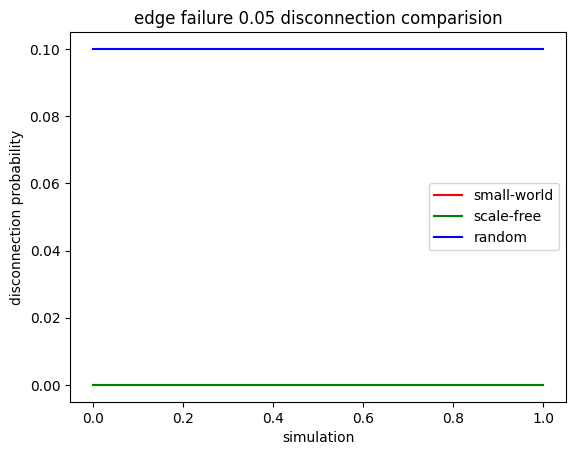

[[0.0, 0.0], [0.0, 0.0], [0.1, 0.1]]
small-world edge disconnection probabilities, mean is:  0.0
small-world edge disconnection probabilities, std is:  0.0
scale-free edge disconnection probabilities, mean is:  0.0
scale-free edge disconnection probabilities, std is:  0.0
random edge disconnection probabilities, mean is:  0.25
random edge disconnection probabilities, std is:  0.04999999999999999


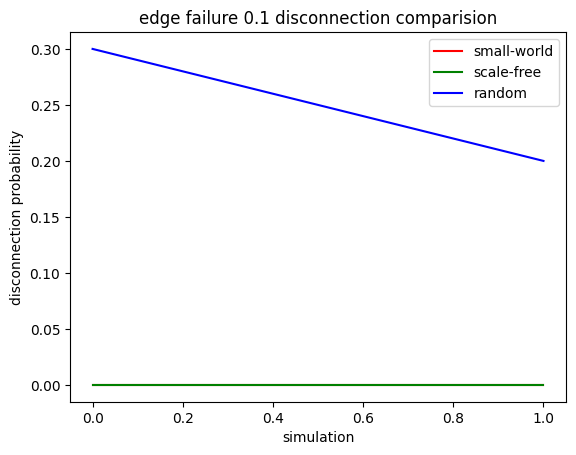

[[0.0, 0.0], [0.0, 0.0], [0.3, 0.2]]
small-world edge disconnection probabilities, mean is:  0.0
small-world edge disconnection probabilities, std is:  0.0
scale-free edge disconnection probabilities, mean is:  0.05
scale-free edge disconnection probabilities, std is:  0.05
random edge disconnection probabilities, mean is:  0.2
random edge disconnection probabilities, std is:  0.0


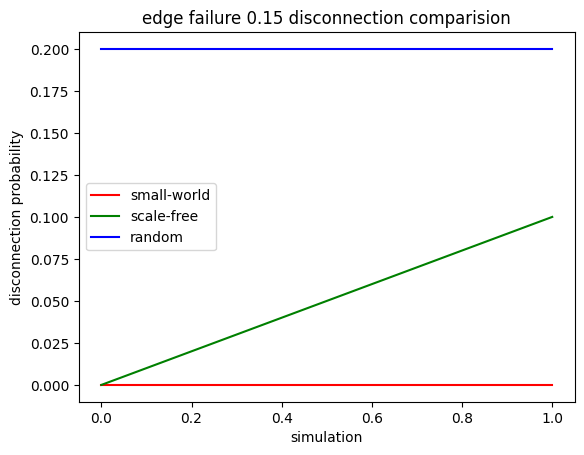

[[0.0, 0.0], [0.0, 0.1], [0.2, 0.2]]
small-world edge disconnection probabilities, mean is:  0.0
small-world edge disconnection probabilities, std is:  0.0
scale-free edge disconnection probabilities, mean is:  0.15000000000000002
scale-free edge disconnection probabilities, std is:  0.05
random edge disconnection probabilities, mean is:  0.3
random edge disconnection probabilities, std is:  0.0


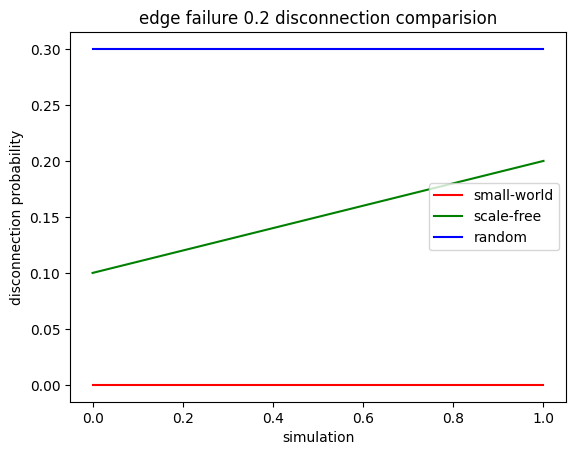

[[0.0, 0.0], [0.1, 0.2], [0.3, 0.3]]
small-world edge disconnection probabilities, mean is:  0.0
small-world edge disconnection probabilities, std is:  0.0
scale-free edge disconnection probabilities, mean is:  0.25
scale-free edge disconnection probabilities, std is:  0.15000000000000002
random edge disconnection probabilities, mean is:  0.35
random edge disconnection probabilities, std is:  0.15


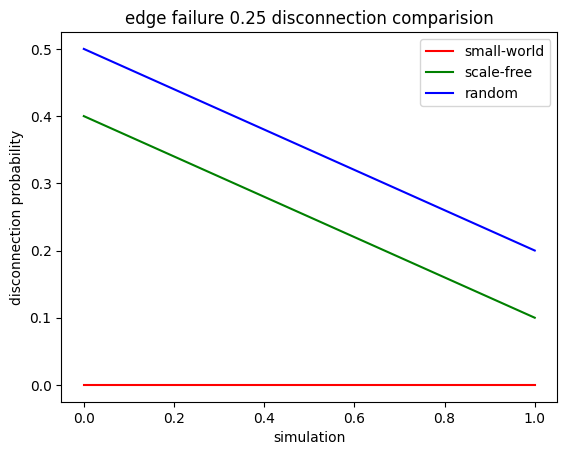

[[0.0, 0.0], [0.4, 0.1], [0.5, 0.2]]
small-world edge disconnection probabilities, mean is:  0.0
small-world edge disconnection probabilities, std is:  0.0
scale-free edge disconnection probabilities, mean is:  0.5
scale-free edge disconnection probabilities, std is:  0.0
random edge disconnection probabilities, mean is:  0.5
random edge disconnection probabilities, std is:  0.09999999999999998


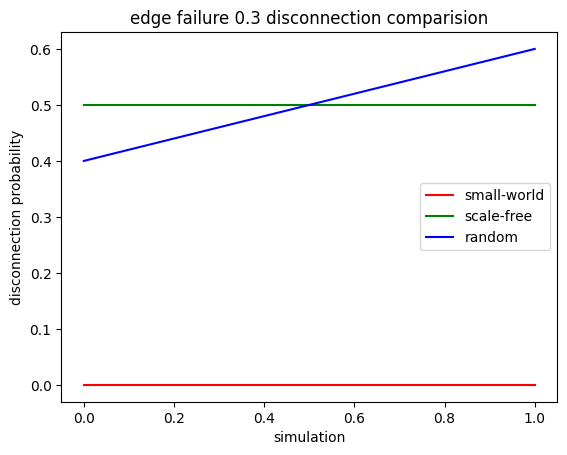

[[0.0, 0.0], [0.5, 0.5], [0.4, 0.6]]
small-world edge disconnection probabilities, mean is:  0.0
small-world edge disconnection probabilities, std is:  0.0
scale-free edge disconnection probabilities, mean is:  0.8500000000000001
scale-free edge disconnection probabilities, std is:  0.04999999999999999
random edge disconnection probabilities, mean is:  0.8500000000000001
random edge disconnection probabilities, std is:  0.04999999999999999


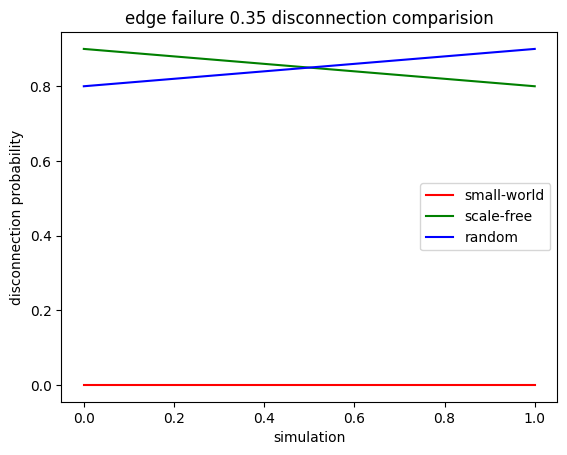

[[0.0, 0.0], [0.9, 0.8], [0.8, 0.9]]
small-world edge disconnection probabilities, mean is:  0.2
small-world edge disconnection probabilities, std is:  0.09999999999999999
scale-free edge disconnection probabilities, mean is:  0.95
scale-free edge disconnection probabilities, std is:  0.04999999999999999
random edge disconnection probabilities, mean is:  0.95
random edge disconnection probabilities, std is:  0.04999999999999999


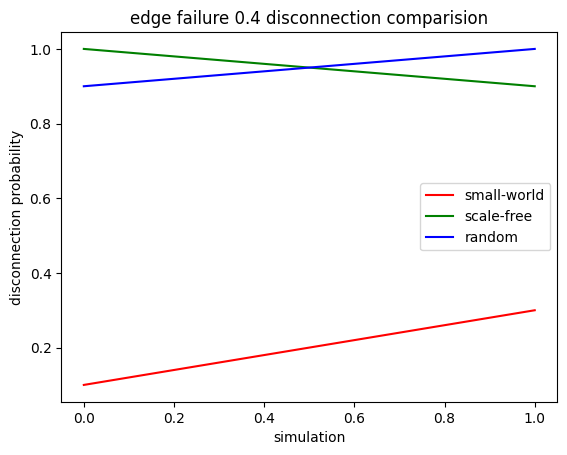

[[0.1, 0.3], [1.0, 0.9], [0.9, 1.0]]
small-world edge disconnection probabilities, mean is:  0.55
small-world edge disconnection probabilities, std is:  0.04999999999999999
scale-free edge disconnection probabilities, mean is:  1.0
scale-free edge disconnection probabilities, std is:  0.0
random edge disconnection probabilities, mean is:  1.0
random edge disconnection probabilities, std is:  0.0


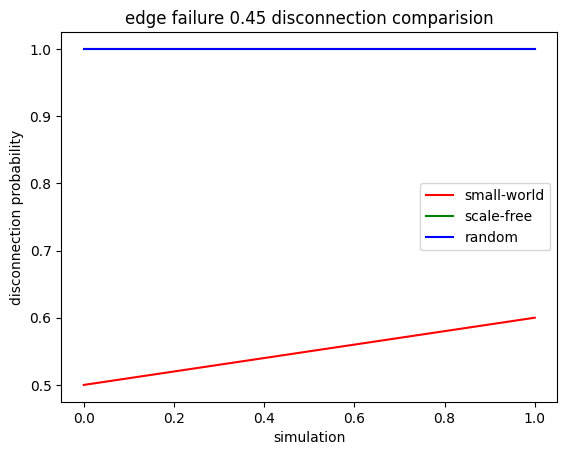

[[0.5, 0.6], [1.0, 1.0], [1.0, 1.0]]
small-world edge disconnection probabilities, mean is:  0.8
small-world edge disconnection probabilities, std is:  0.10000000000000003
scale-free edge disconnection probabilities, mean is:  1.0
scale-free edge disconnection probabilities, std is:  0.0
random edge disconnection probabilities, mean is:  1.0
random edge disconnection probabilities, std is:  0.0


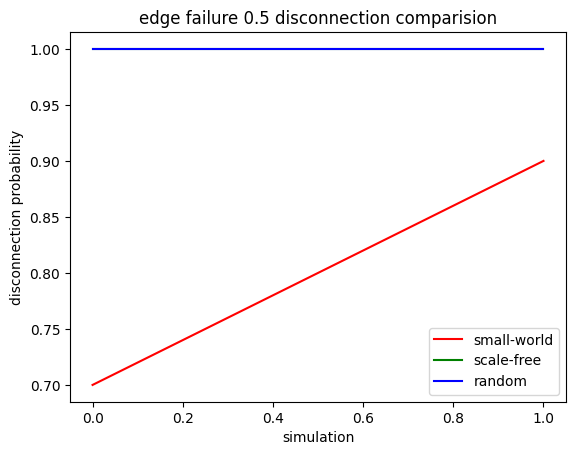

[[0.7, 0.9], [1.0, 1.0], [1.0, 1.0]]
small-world edge disconnection probabilities, mean is:  1.0
small-world edge disconnection probabilities, std is:  0.0
scale-free edge disconnection probabilities, mean is:  1.0
scale-free edge disconnection probabilities, std is:  0.0
random edge disconnection probabilities, mean is:  1.0
random edge disconnection probabilities, std is:  0.0


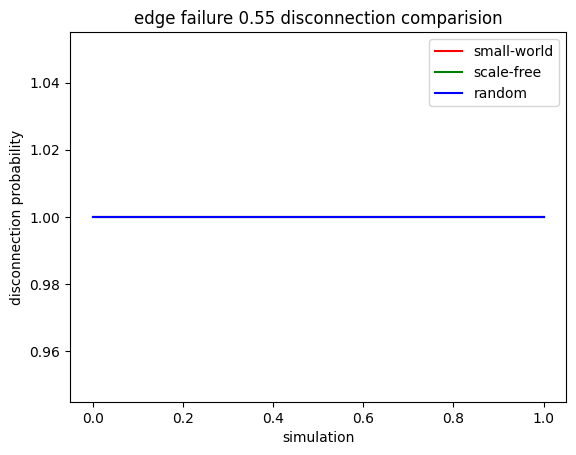

[[1.0, 1.0], [1.0, 1.0], [1.0, 1.0]]
small-world edge disconnection probabilities, mean is:  1.0
small-world edge disconnection probabilities, std is:  0.0
scale-free edge disconnection probabilities, mean is:  1.0
scale-free edge disconnection probabilities, std is:  0.0
random edge disconnection probabilities, mean is:  1.0
random edge disconnection probabilities, std is:  0.0


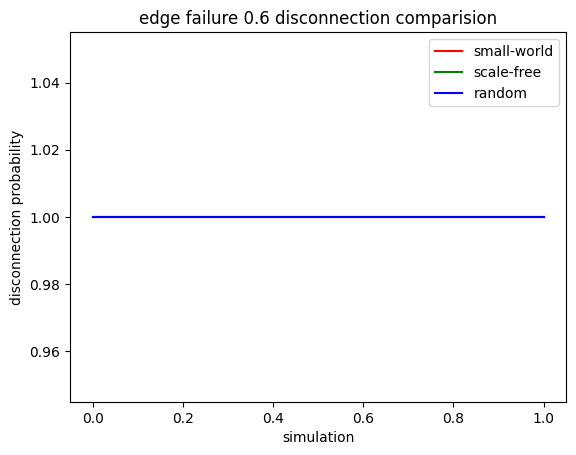

[[1.0, 1.0], [1.0, 1.0], [1.0, 1.0]]
small-world edge disconnection probabilities, mean is:  1.0
small-world edge disconnection probabilities, std is:  0.0
scale-free edge disconnection probabilities, mean is:  1.0
scale-free edge disconnection probabilities, std is:  0.0
random edge disconnection probabilities, mean is:  1.0
random edge disconnection probabilities, std is:  0.0


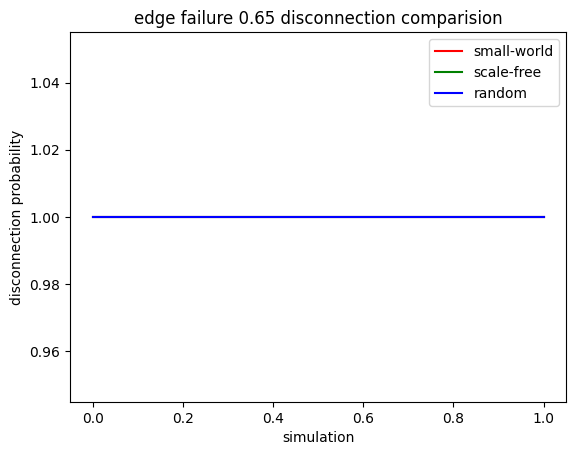

[[1.0, 1.0], [1.0, 1.0], [1.0, 1.0]]
small-world edge disconnection probabilities, mean is:  1.0
small-world edge disconnection probabilities, std is:  0.0
scale-free edge disconnection probabilities, mean is:  1.0
scale-free edge disconnection probabilities, std is:  0.0
random edge disconnection probabilities, mean is:  1.0
random edge disconnection probabilities, std is:  0.0


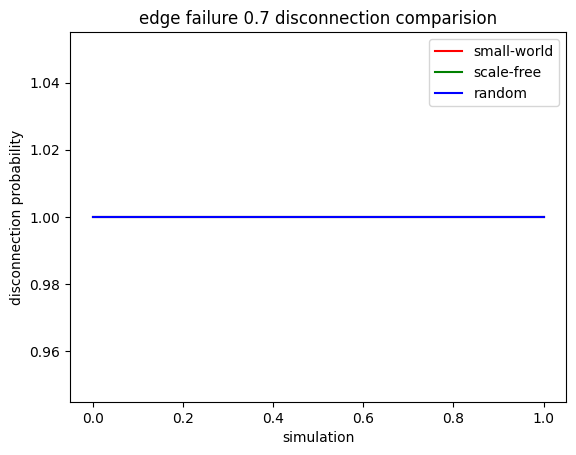

[[1.0, 1.0], [1.0, 1.0], [1.0, 1.0]]
small-world edge disconnection probabilities, mean is:  1.0
small-world edge disconnection probabilities, std is:  0.0
scale-free edge disconnection probabilities, mean is:  1.0
scale-free edge disconnection probabilities, std is:  0.0
random edge disconnection probabilities, mean is:  1.0
random edge disconnection probabilities, std is:  0.0


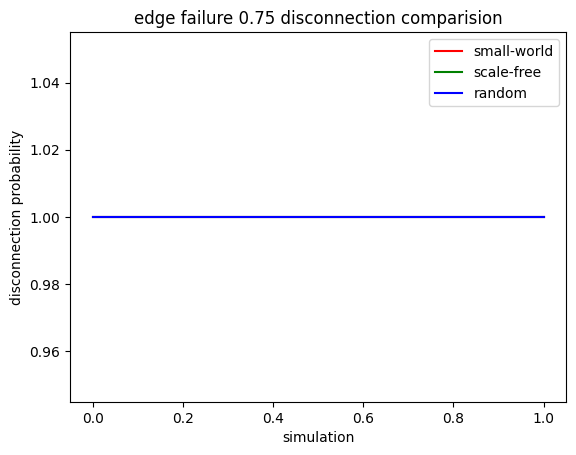

[[1.0, 1.0], [1.0, 1.0], [1.0, 1.0]]


In [ ]:
lables = ['small-world', 'scale-free', 'random']
datas = [small_world_edge_disconnections, scale_free_edge_disconnections, random_edge_disconnections]
compare(datas, lables, failure_kind='edge', result_kind='disconnection', style='-')